# Fall 2024 Final Project (OPIM 5512 and 5509)
**Dr. Dave Wanik - Dept. of Operations and Information Management - University of Connecticut**

Can you predict the level of problematic internet usage exhibited by children and adolescents, based on their physical activity? The goal of this competition is to develop a predictive model that analyzes children's physical activity and fitness data to identify early signs of problematic internet use. Identifying these patterns can help trigger interventions to encourage healthier digital habits.

For our final project (5512 and 5509), we are going to use a simplified version of this Kaggle competition. On your own, you are welcome to submit to the final competition (and I hope you try!)

* https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/data

* Group Number: Group 4
* Names of Groups Members: Rohit Akole

By submitting this project, I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.

All you should care about are the IDs of the 996 observations where a parquet file exists! This should help simplify your problem.

# 🔴 Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work. Do not send sloppy code and think you'll be fine - pretend this document is going to your AVP of Data Science - It should be both technical and business-friendly. If you send me garbage, your grade will be garbage!

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
* You all have 986 rows to start in the dataset (the rows in train.csv that have a corresponding parquet file - there are 996 parquet files but 10 are empty, so we will just use the 986 with at least SOME data.)
  * Any team who does not use this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like SMOTE, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!
  * OPIM 5512 students must use models taught in class (i.e. sklearn models)
  * OPIM 5509 students must use models taught in their class (keras models, DNNs, ConvNets, RNNs etc.)

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.
  * You may change the classification threshold from 0.5 to anything else that improves your score.
* Verify your shape of the train and test partitions to ensure there is no data leakage!
* You are being graded on the best weighted F1 score
  * https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html (it can be read from the bottom right of the classification report)

## Interpretability and Discussion (30 points)
* Create permutation importance for top five variables (for OPIM 5512 students, optional for OPIM 5509 students)
* Create partial dependence plots for top five variables (for OPIM 5512 students, optional for OPIM 5509 students)
  * Don't forget about the `num_grid_points` argument to your PDP if it takes a long time to make the plot.
  * Don't wait until the last minute and say your code was crashing - work on this early or I have to deduct points!
* You SHOULD add other tables/plots/analyses to help tell your story! Why is your model predicting the way it does? What things did you try to capture in your model? Did you use a simpler set of predictors or just use the whole kitchen sink?
  * OPIM 5509 students really have to dig into what they think are driving their model predictions.
* I am looking for each team to provide a business recommendation based on the results of your model - what do we think is causing problem internet usage! Do we need the detailed time series data? Or do we just need demographic data? We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.
  * Don't use ChatGPT or you get 0 points for this.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 70 to a 100 based on model weifhted F1 score for the TEST PARTITION (you can use the `weighted F1 score` function from sci-kit learn to evaluate the final model.)
  * https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


# #1. Dependencies

---




In [1]:
!pip install tsfresh
!pip install --upgrade scipy
!pip install ipython-autotime
!pip install pulp
!pip install pycebox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 83.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl

In [172]:
%load_ext autotime
import warnings
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import shap
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
import pyarrow.parquet as pq
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Input, Dense, LSTM, SimpleRNN, GRU, Dropout, Masking, Concatenate, Flatten, Conv1D, MaxPooling1D, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from types import new_class
from keras import backend as K
from IPython.display import display

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.44 ms (started: 2024-12-01 13:28:53 +00:00)


* Importing all the necessary modules and libraries.
* Setting autotime to look at the time each cell is taking.
* Importing tsfresh for feature selection.

# #2. Mounting GDrive

---





In [3]:
# Load Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

time: 388 µs (started: 2024-12-01 11:02:43 +00:00)


In [4]:
# Download Files
# !gdown 1E0Zi2vmC3ypEowcdrfl6vnb1r7Igz-ck # Child-Mind Kaggle Zip
!gdown 194NhaPc1hSCOU8UaDDsAHMUnfJ9mPpQq # Demographic Dataset
!gdown 1uj7sfriuuTLiS3zQLIqofIVtkiVFt0QQ # EfficientFC Zip
!gdown 1jluWZ74SWSS3RsBdlZh9dapZYCzLMIKu # F24 with ID Zip
!gdown 1sm9ysLMcaRAVzcWLV_G6yU7JF3HaokKC # MinFC Zip
!gdown 1o3nY7IKt8OlMf-ijBUk1WuMwuu8uoBpI # SomeFC Zip

Downloading...
From: https://drive.google.com/uc?id=194NhaPc1hSCOU8UaDDsAHMUnfJ9mPpQq
To: /content/train.csv
100% 945k/945k [00:00<00:00, 20.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1uj7sfriuuTLiS3zQLIqofIVtkiVFt0QQ
From (redirected): https://drive.google.com/uc?id=1uj7sfriuuTLiS3zQLIqofIVtkiVFt0QQ&confirm=t&uuid=12274559-f613-4754-a6e2-8f2396221d08
To: /content/EfficientFC_results-20241120T155302Z-001.zip
100% 126M/126M [00:02<00:00, 61.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jluWZ74SWSS3RsBdlZh9dapZYCzLMIKu
To: /content/F24_DS_DL_finalProject_data_withID.zip
100% 127k/127k [00:00<00:00, 45.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sm9ysLMcaRAVzcWLV_G6yU7JF3HaokKC
To: /content/MinFC_results-20241120T125015Z-001.zip
100% 1.82M/1.82M [00:00<00:00, 118MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1o3nY7IKt8OlMf-ijBUk1WuMwuu8uoBpI
From (redirected): https://drive.google.com/uc?id=1o3nY7IKt8OlMf-ijBUk

# #3. Unzipping the Data

---



In [5]:
# Unzip files
# !unzip -o /content/drive/MyDrive/DL_Project/child-mind-institute-problematic-internet-use.zip
!unzip -o F24_DS_DL_finalProject_data_withID.zip
!unzip -o EfficientFC_results-20241120T155302Z-001.zip
!unzip -o MinFC_results-20241120T125015Z-001.zip
!unzip -o SomeFC_results-20241120T141936Z-001.zip

Archive:  F24_DS_DL_finalProject_data_withID.zip
  inflating: y_test_F24_withID.csv   
  inflating: X_train_F24_withID.csv  
  inflating: X_test_F24_withID.csv   
  inflating: y_train_F24_withID.csv  
Archive:  EfficientFC_results-20241120T155302Z-001.zip
  inflating: EfficientFC_results/id=8078b7de.csv  
  inflating: EfficientFC_results/id=33fe1b04.csv  
  inflating: EfficientFC_results/id=467c549f.csv  
  inflating: EfficientFC_results/id=d4d9f7f9.csv  
  inflating: EfficientFC_results/id=64ed48c4.csv  
  inflating: EfficientFC_results/id=75b0446f.csv  
  inflating: EfficientFC_results/id=a3391798.csv  
  inflating: EfficientFC_results/id=7e46b693.csv  
  inflating: EfficientFC_results/id=cb73fed9.csv  
  inflating: EfficientFC_results/id=5cd83147.csv  
  inflating: EfficientFC_results/id=f6b719ee.csv  
  inflating: EfficientFC_results/id=7ce36c38.csv  
  inflating: EfficientFC_results/id=9570bfb7.csv  
  inflating: EfficientFC_results/id=2898269f.csv  
  inflating: EfficientFC_resul

* All the necessary files are unzipped and downloaded successfully from google drive.
* Since we are unzipping directly from google drive, it saves us time to download and then unzip the dataset.

# #4. Load the DataFrame

---



In [6]:
# Define the directory where your parquet files are located
parquet_dir = '/content/series_train.parquet'

# Load the dataframes
demographics_df = pd.read_csv('train.csv') # Assuming 'train.csv' is your demographics file
X_train_df = pd.read_csv('X_train_F24_withID.csv', index_col=0)
X_test_df = pd.read_csv('X_test_F24_withID.csv', index_col=0)
y_train_df = pd.read_csv('y_train_F24_withID.csv', index_col=0)
y_test_df = pd.read_csv('y_test_F24_withID.csv', index_col=0)
# Merge the dataframes based on the 'id' column
merged_df = pd.merge(X_train_df, demographics_df, on='id', how='left')
test_merged_df = pd.merge(X_test_df, demographics_df, on='id', how='left')

time: 191 ms (started: 2024-12-01 11:04:25 +00:00)


* Load all the csv files which are unzipped in the last cell.
* Merge the train and test dataframes to demographic dataframe.

## #4.1. Look at the DataFrame Heads

In [7]:
y_train_df.head()

,sii,id
626,1.0,a0522c83
307,1.0,4a4a0f78
662,1.0,a8b0428d
394,0.0,6282e693
644,0.0,a4530b41


time: 36.1 ms (started: 2024-12-01 11:04:25 +00:00)


In [8]:
y_test_df.head()

,sii,id
832,1.0,d8037389
970,1.0,fa34f945
96,0.0,15f2e240
587,1.0,98ed2153
450,1.0,7187caec


time: 28.6 ms (started: 2024-12-01 11:04:25 +00:00)


In [9]:
# Demographics Data
print('\t\t\tDemographics Data')
pprint(demographics_df.head())

# X_train Data
print('\n\t\t\tX_train_df')
pprint(X_train_df.head())

# X_test Data
print('\n\t\t\tX_test_df')
pprint(X_test_df.head())

# y_train Data
print('\n\t\t\ty_train_df')
pprint(y_train_df.head())

# y_test Data
print('\n\t\t\ty_test_df')
pprint(y_test_df.head())

			Demographics Data
         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  

In [10]:
# Merged Train DataFrame
print('\t\t\tMerged DataFrame')
pprint(merged_df.head())

# Merged Test DataFrame
print('\n\t\t\tMerged Test DataFrame')
pprint(test_merged_df.head())

			Merged DataFrame
         id         0         1         2         3         4          5  \
0  a0522c83  200315.5 -0.505789 -0.069706  0.013336  0.025508   1.611984   
1  4a4a0f78  190155.5  0.121610  0.032871  0.152650  0.034276  10.249540   
2  a8b0428d     692.5 -0.275158  0.259596  0.317515  0.029915  20.623983   
3  6282e693   68514.0 -0.256388 -0.066792 -0.174034  0.086394 -12.297556   
4  a4530b41  203633.5  0.016842 -0.047838  0.140291  0.047017   8.838480   

         6          7            8  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
0  0.03190  21.629858  3850.230225  ...             5.0             4.0   
1  0.00000  22.919933  3814.928467  ...             1.0             3.0   
2  0.00000  25.377674  3887.100342  ...             2.0             2.0   
3  0.00000  87.192596  3991.940674  ...             0.0             0.0   
4  0.04807  17.082886  3839.499756  ...             0.0             0.0   

   PCIAT-PCIAT_20  PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  \
0 

## #4.2. Info before removing the redundant variables


In [11]:
pprint(merged_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 95 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      796 non-null    object 
 1   0                                       796 non-null    float64
 2   1                                       796 non-null    float64
 3   2                                       796 non-null    float64
 4   3                                       796 non-null    float64
 5   4                                       796 non-null    float64
 6   5                                       796 non-null    float64
 7   6                                       796 non-null    float64
 8   7                                       796 non-null    float64
 9   8                                       796 non-null    float64
 10  9                                       796 non-null    float6

* The above cells shows that we have a lot of object datatype variables.
* Rest of the variables are float64 datatype.

# #5. Data Processing

---

## #5.1. Removing Columns from X DataFrames


In [12]:
# Remove specified columns with more NaN rows
columns_to_remove = ['Physical-Waist_Circumference', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
                     'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'PAQ_A-PAQ_A_Total', 'sii']

# Drop the columns from merged_df and test_merged_df
merged_df = merged_df.drop(columns=columns_to_remove, errors='ignore')
test_merged_df = test_merged_df.drop(columns=columns_to_remove, errors='ignore')

# Remove columns from index 1 to 13 (inclusive)
merged_df = merged_df.drop(merged_df.columns[1:14], axis=1)
test_merged_df = test_merged_df.drop(test_merged_df.columns[1:14], axis=1)

# Drop columns starting with PCIAT
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if col.startswith('PCIAT')])
test_merged_df = test_merged_df.drop(columns=[col for col in test_merged_df.columns if col.startswith('PCIAT')])

time: 9.89 ms (started: 2024-12-01 11:04:26 +00:00)


* I removed the variables since the specified columns had very less values and more NaN rows.
* I removed columns named 0 to 12 as we are going to merge the filtered features which we are extracting usign the tsfresh.
* To take care of the target leakage, I removed all the variables starting with PCIAT.

## #5.2. Change Datatype of y variable

In [13]:
# Checking the y variables
print(y_train_df.info())
print(y_test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 626 to id
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sii     797 non-null    object
 1   id      796 non-null    object
dtypes: object(2)
memory usage: 51.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 832 to id
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sii     201 non-null    object
 1   id      200 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB
None
time: 21.1 ms (started: 2024-12-01 11:04:26 +00:00)


* The y variable (sii) is in object datatype in both train and test.

In [14]:
# Convert 'sii' to numeric, coercing errors to NaN
y_train_df['sii'] = pd.to_numeric(y_train_df['sii'], errors='coerce')
y_test_df['sii'] = pd.to_numeric(y_test_df['sii'], errors='coerce')

# Check data types
print(y_train_df.info())
print(y_test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 626 to id
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sii     796 non-null    float64
 1   id      796 non-null    object 
dtypes: float64(1), object(1)
memory usage: 51.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 832 to id
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sii     200 non-null    float64
 1   id      200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.8+ KB
None
time: 24.9 ms (started: 2024-12-01 11:04:26 +00:00)


* Converted the target variable (sii) from object to float using .to_numeric.
* Now the target variable can be used in the model.

## #5.3. Simple Encoding

In [15]:
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the columns of the DataFrame
for col in merged_df.columns:
  # Skip the 'id' column
  if col != 'id':
    # Check if the column is of object type
    if merged_df[col].dtype == 'object':
      # Fit the LabelEncoder on the training data
      le.fit(merged_df[col])
      # Transform the training data
      merged_df[col] = le.transform(merged_df[col])
      # Transform the test data
      test_merged_df[col] = le.transform(test_merged_df[col])

time: 25.3 ms (started: 2024-12-01 11:04:26 +00:00)


* Encoded all the object type variables using LabelEncoder.
* This encoded all the variables in place.

### #5.3.1. After Simple Encoding and removing the variables

In [16]:
pprint(merged_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      796 non-null    object 
 1   Basic_Demos-Enroll_Season               796 non-null    int64  
 2   Basic_Demos-Age                         796 non-null    int64  
 3   Basic_Demos-Sex                         796 non-null    int64  
 4   CGAS-Season                             796 non-null    int64  
 5   CGAS-CGAS_Score                         767 non-null    float64
 6   Physical-Season                         796 non-null    int64  
 7   Physical-BMI                            786 non-null    float64
 8   Physical-Height                         789 non-null    float64
 9   Physical-Weight                         787 non-null    float64
 10  Physical-Diastolic_BP                   780 non-null    float6

* As seen in the info, all the variables are stored as int64 or float.
* There are still NaN rows in quite a lot of variables.

## 5.4. Imputing the Variables Using TSFresh

In [17]:
# Replace inf and -inf with NaN
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert columns (excluding 'id') to numeric
for col in merged_df.columns:
    if col != 'id':
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

for col in test_merged_df.columns:
    if col != 'id':
        test_merged_df[col] = pd.to_numeric(test_merged_df[col], errors='coerce')

# Suppress warnings for tsfresh
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)

    # Apply tsfresh impute (work on a copy of the DataFrame)
    merged_df.loc[:, merged_df.columns != 'id'] = impute(merged_df.loc[:, merged_df.columns != 'id'].copy())
    test_merged_df.loc[:, test_merged_df.columns != 'id'] = impute(test_merged_df.loc[:, test_merged_df.columns != 'id'].copy())

time: 284 ms (started: 2024-12-01 11:04:26 +00:00)


* I replaced all inf and -inf into nan.
* I converted all the features into numeric except id column.
* Using TSFresh library, I imputed the variables except id column.

### #5.4.1. Statistics for Merged_df DataFrame

In [18]:
# merged_df describe all columns
print(merged_df.describe(include='all'))

              id  Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
count        796                 796.000000       796.000000       796.000000   
unique       796                        NaN              NaN              NaN   
top     a0522c83                        NaN              NaN              NaN   
freq           1                        NaN              NaN              NaN   
mean         NaN                   1.430905        10.359296         0.354271   
std          NaN                   1.098426         3.468681         0.478593   
min          NaN                   0.000000         5.000000         0.000000   
25%          NaN                   0.000000         8.000000         0.000000   
50%          NaN                   1.000000        10.000000         0.000000   
75%          NaN                   2.000000        12.000000         1.000000   
max          NaN                   3.000000        21.000000         1.000000   

        CGAS-Season  CGAS-C

### #5.4.2. Correlation Plot Before Feature Engineering

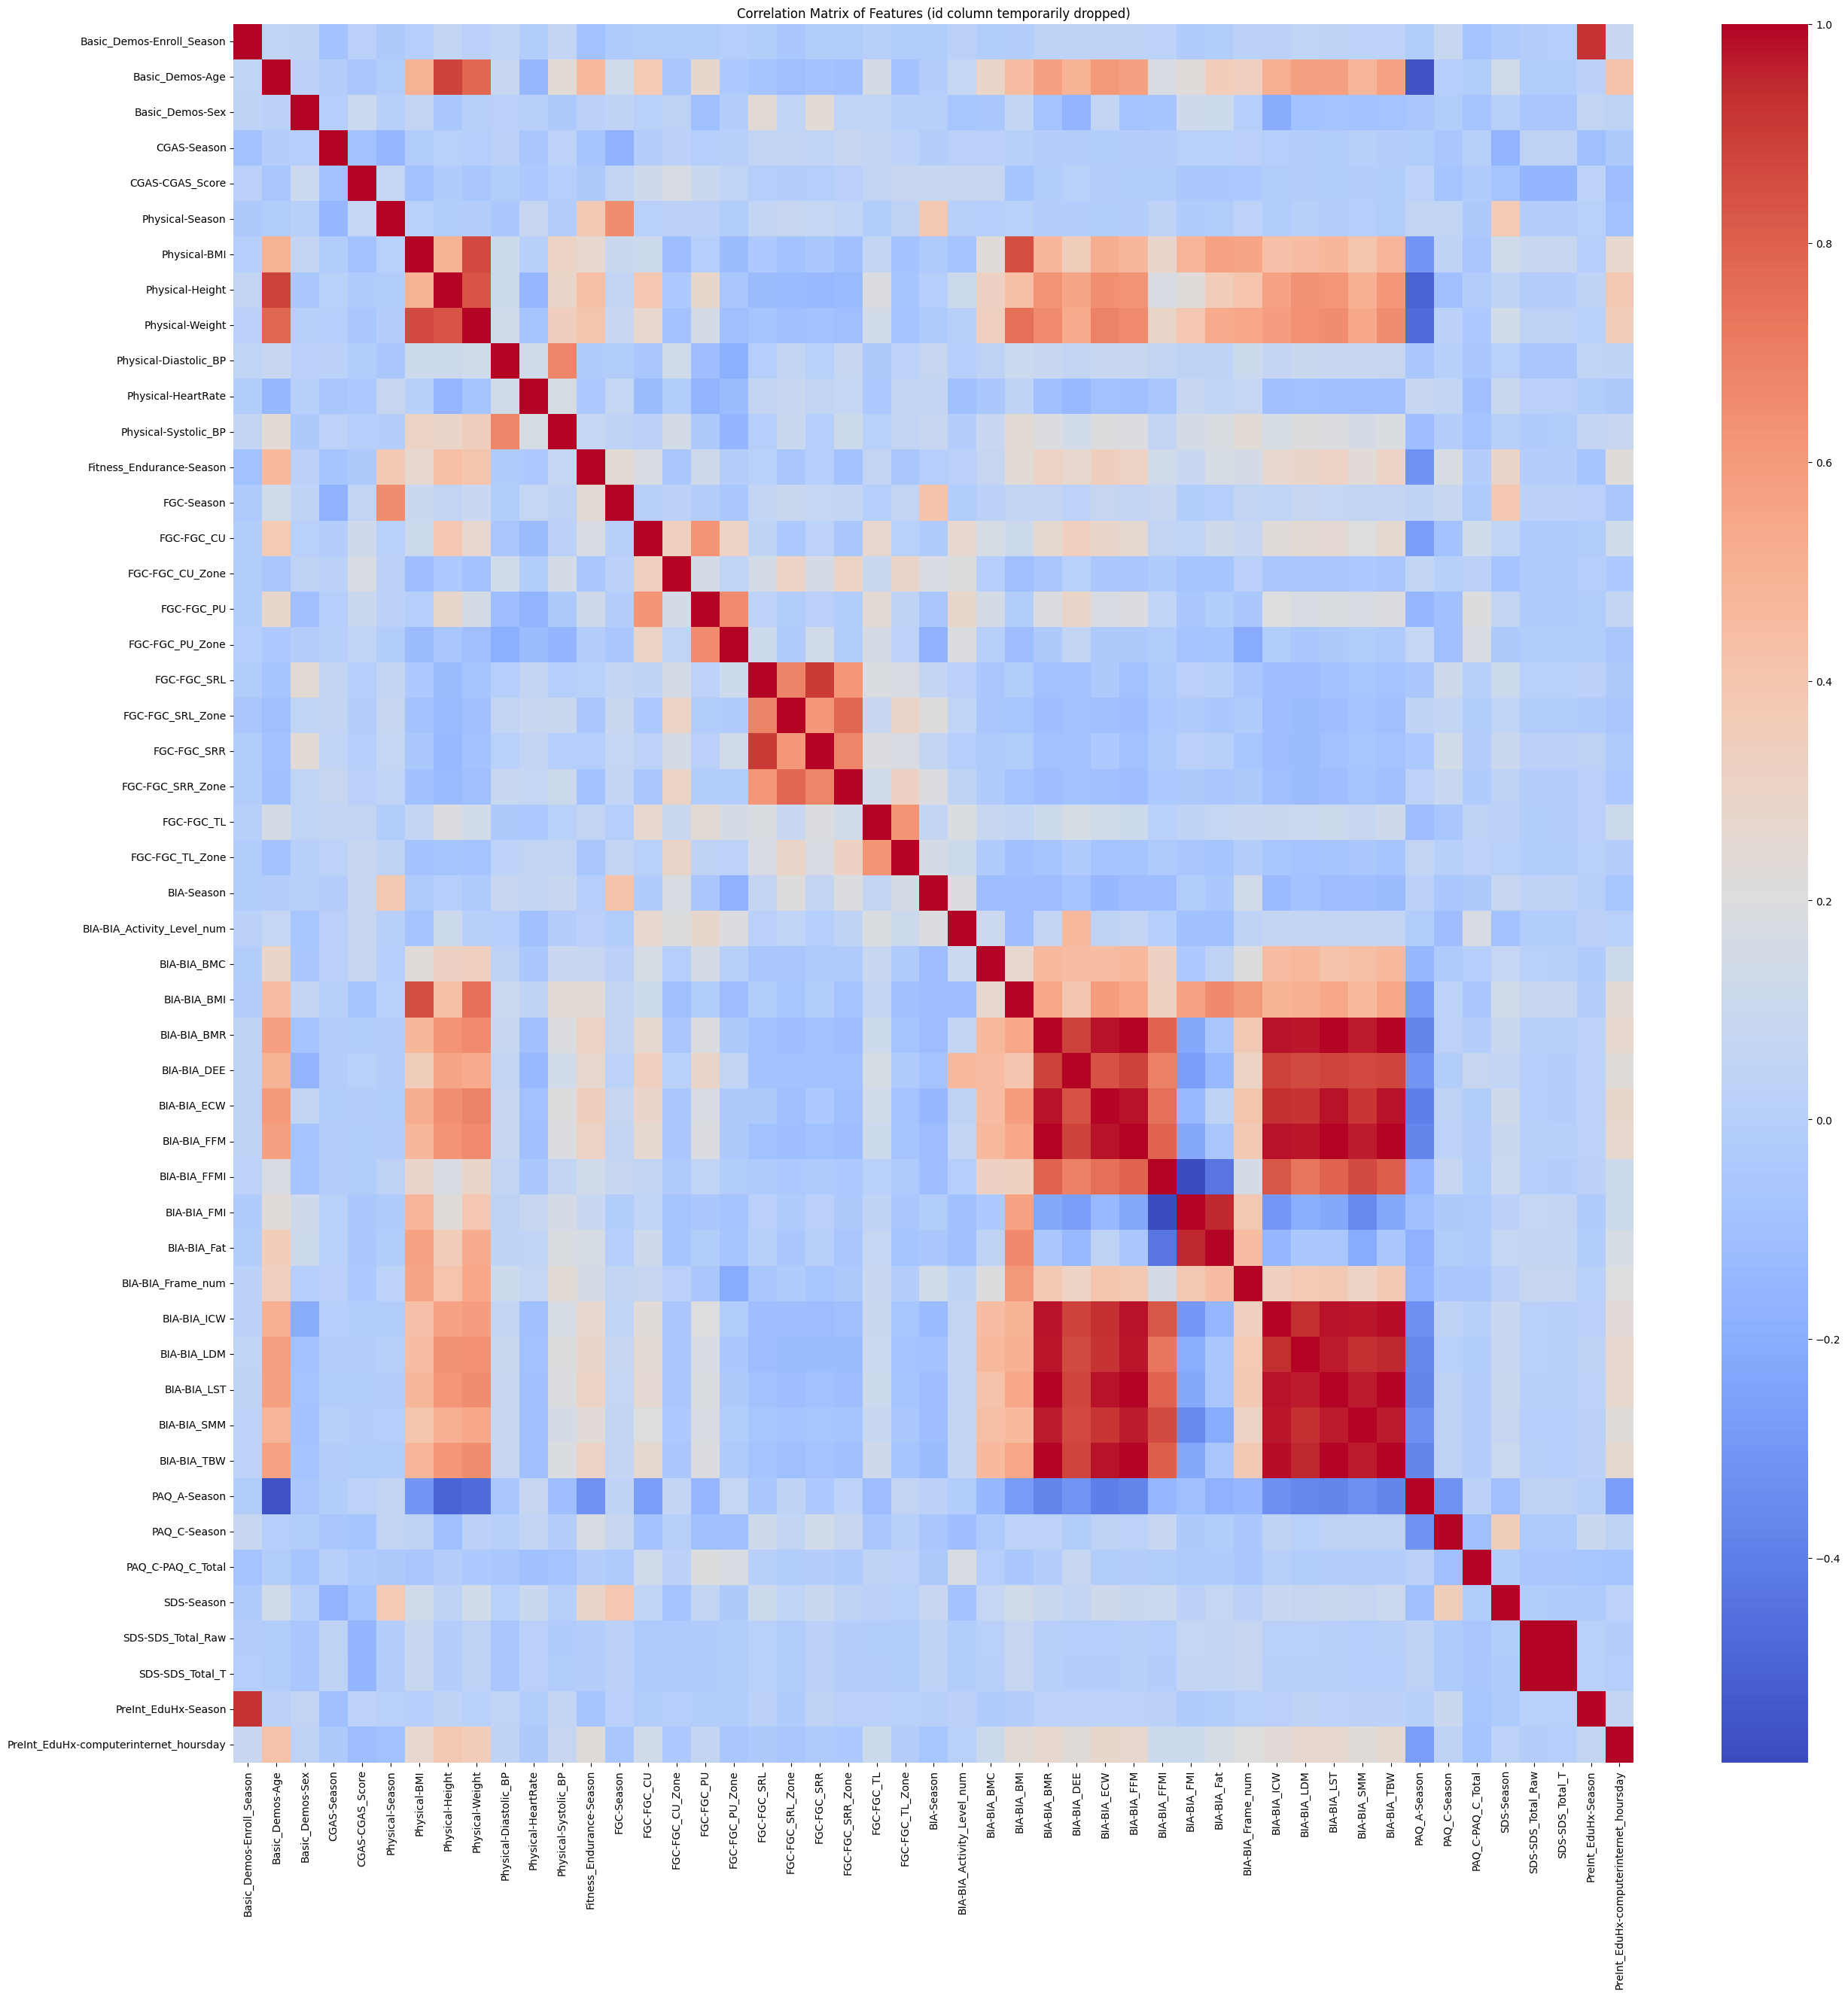

time: 2.5 s (started: 2024-12-01 11:04:26 +00:00)


In [19]:
# Temporarily drop the 'id' column
temp_df = merged_df.drop('id', axis=1)

# Convert columns with 'object' dtype to numeric, handling errors
for col in temp_df.select_dtypes(include=['object']).columns:
    try:
        # Attempt to convert to numeric, replacing errors with NaN
        temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce')
    except (ValueError, TypeError):
        print(f"Could not convert column '{col}' to numeric. Skipping...")

# Calculate the correlation matrix after conversion
correlation_matrix = temp_df.corr()

# Create the heatmap
plt.figure(figsize=(30, 30))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features (id column temporarily dropped)')
plt.show()

* **High Correlations:**
  * Some features exhibit very high correlations (red squares). For instance:
    * BIA metrics like BIA-BMR, BIA-DEE, and BIA-TBW are highly correlated, indicating redundant information.
    * Physical measurements such as Physical-Diastolic_BP and Physical-Systolic_BP show strong positive correlations.
* **Low or No Correlation:**
  * Many features exhibit low correlations (blue or light areas), indicating little to no linear relationship.
* **Blocks of Correlated Features:**
  * Certain blocks of features (e.g., BIA-related or FGC-related metrics) have strong internal correlations, likely representing attributes of similar measurements or categories.

# #6. Five Plots

---

## #6.1. Plot 1. Pairplot for BMI, Height, and Weight by Season

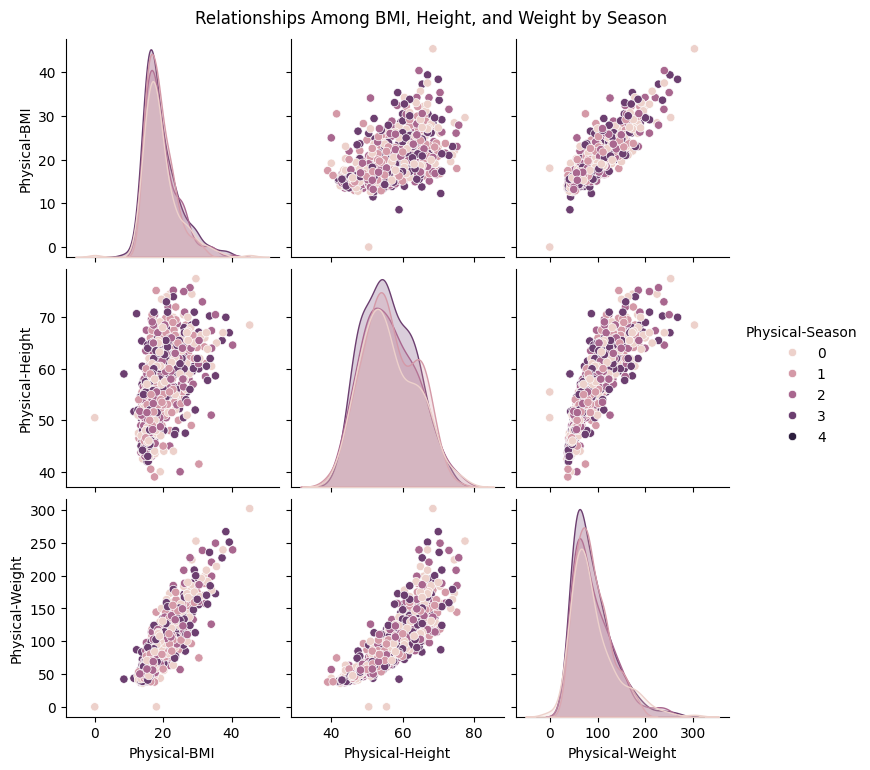

time: 4.43 s (started: 2024-12-01 11:04:29 +00:00)


In [20]:
# 1. Pairplot for BMI, Height, and Weight grouped by Season
sns.pairplot(merged_df, vars=["Physical-BMI", "Physical-Height", "Physical-Weight"], hue="Physical-Season", diag_kind="kde")
plt.suptitle("Relationships Among BMI, Height, and Weight by Season", y=1.02)
plt.show()

* **Overview:** This pairplot visualizes relationships between BMI, Height, and Weight, colored by the Physical-Season variable (0 to 4).
* **Key Observations:**
  * **BMI vs. Weight:** A strong positive correlation is visible, as expected.
  * **BMI vs. Height:** A moderate positive correlation is observed, though it’s less pronounced compared to BMI-Weight.
  * **Height vs. Weight:** A clear positive trend indicates that taller individuals tend to weigh more.
* **Distributions:** All three variables (BMI, Height, Weight) show varying density distributions across seasons. The overlaying KDE curves suggest subtle differences in distributions by season.
* **Seasonal Insights:** There is no significant separation in the data based on Physical-Season, suggesting these relationships are consistent across seasons.

## #6.2. Plot 2. BMI Distribution by Season

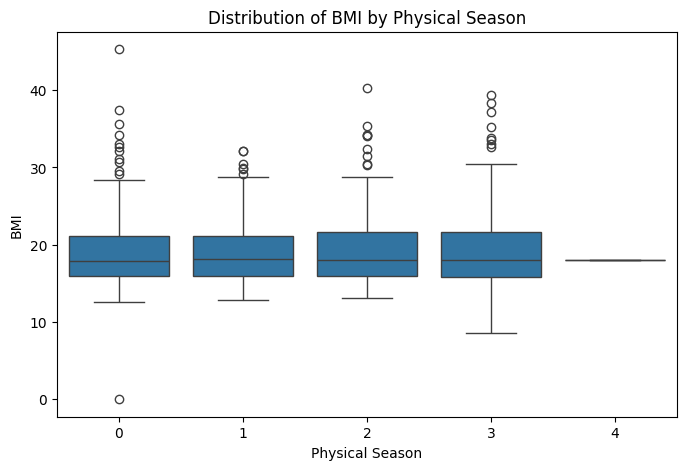

time: 275 ms (started: 2024-12-01 11:04:33 +00:00)


In [21]:
# 2. Distribution of Physical-BMI by Season
plt.figure(figsize=(8, 5))
sns.boxplot(x="Physical-Season", y="Physical-BMI", data=merged_df)
plt.title("Distribution of BMI by Physical Season")
plt.xlabel("Physical Season")
plt.ylabel("BMI")
plt.show()

* The median BMI remains relatively consistent across seasons, centered around 18–20.
* The interquartile range (IQR) is similar across seasons, indicating comparable variability in BMI.
* **Outliers:** All seasons have outliers, particularly on the higher end (BMI > 30), which may indicate individuals with significantly higher BMI.
* Season 4 has a much smaller range, likely due to fewer data points or uniform BMI values.

## #6.3. Plot 3. SDS Total Raw and Total T Scores

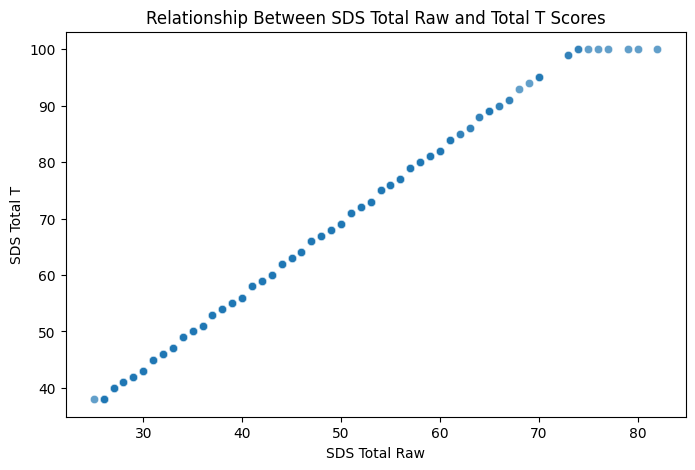

time: 297 ms (started: 2024-12-01 11:04:34 +00:00)


In [22]:
# 3. Relationship Between SDS Total Raw and Total T Scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x="SDS-SDS_Total_Raw", y="SDS-SDS_Total_T", data=merged_df, alpha=0.7)
plt.title("Relationship Between SDS Total Raw and Total T Scores")
plt.xlabel("SDS Total Raw")
plt.ylabel("SDS Total T")
plt.show()

* The relationship is almost perfectly linear, indicating a strong positive correlation between the two scores.
* At higher raw scores (above ~70), the T scores plateau around 100, suggesting an upper limit or cap for the T score.
* The linear trend suggests that SDS Total Raw can be a reliable predictor for SDS Total T, up to the capped range.

## #6.4. Plot 4. Average Heart Rate by BMI

<ipython-input-23-6666585ceb93>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_rate_by_bmi = df_copy.groupby("BMI_Category")["Physical-HeartRate"].mean()


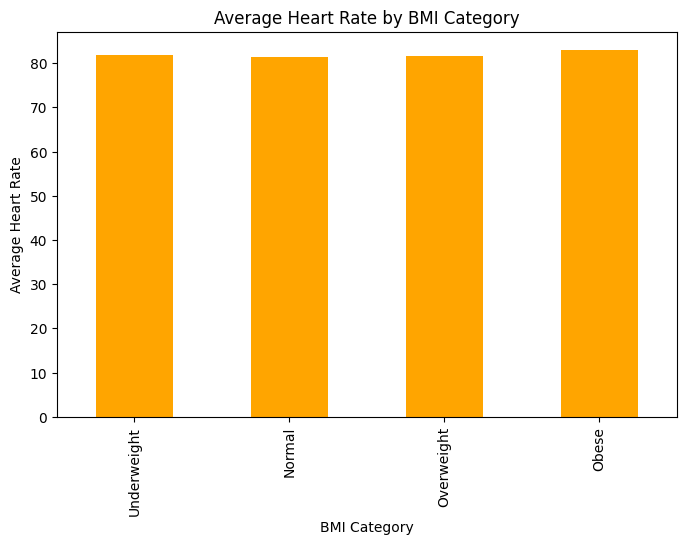

time: 309 ms (started: 2024-12-01 11:04:34 +00:00)


In [23]:
# 4. Average Heart Rate by BMI Category

# Create a copy of the DataFrame to avoid modifying the original
df_copy = merged_df.copy()

# Add BMI categories to the copy
df_copy["BMI_Category"] = pd.cut(
    df_copy["Physical-BMI"], bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

# Calculate average heart rate by BMI category
heart_rate_by_bmi = df_copy.groupby("BMI_Category")["Physical-HeartRate"].mean()

# Plot the result
heart_rate_by_bmi.plot(kind="bar", color="orange", figsize=(8, 5))
plt.title("Average Heart Rate by BMI Category")
plt.ylabel("Average Heart Rate")
plt.xlabel("BMI Category")
plt.show()

* The average heart rate is fairly consistent across BMI categories, with only
slight variations.
* Obese individuals have the highest average heart rate, while Normal BMI individuals have the lowest.
* The differences between categories are minimal, suggesting BMI has limited influence on average heart rate in this dataset.

## #6.5. Plot 5. Diastolic BP vs. Systolic BP Scatter Plot


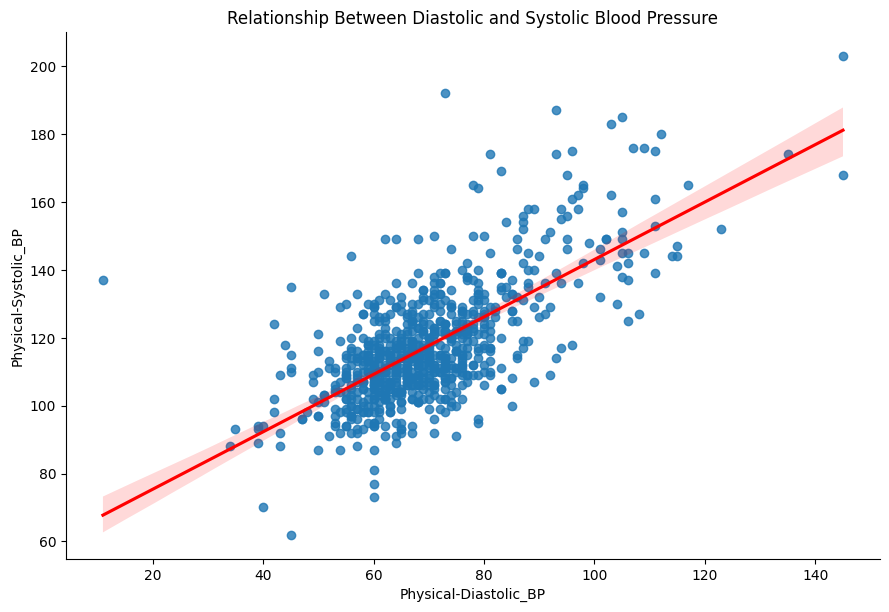

time: 569 ms (started: 2024-12-01 11:04:34 +00:00)


In [24]:
# 5. Scatter plot of Diastolic BP vs. Systolic BP with regression line
sns.lmplot(x="Physical-Diastolic_BP", y="Physical-Systolic_BP", data=merged_df, line_kws={"color": "red"}, height=6, aspect=1.5)
plt.title("Relationship Between Diastolic and Systolic Blood Pressure")
plt.show()

* There is a strong positive correlation between diastolic and systolic blood pressure, as shown by the upward sloping trend line.
* Most data points cluster between 60–100 for diastolic BP and 100–140 for systolic BP, indicating common blood pressure ranges.
* The linear regression line fits well, with a narrow confidence interval (shaded area), highlighting a consistent relationship.
* A few outliers are visible at higher diastolic and systolic values, indicating extreme cases.

# #7. Five Tables

---

## #7.1. Table 1. Physical Measurements Summary

In [25]:
# 1. Table: Summary of Physical Measurements (BMI, Height, Weight)
physical_summary = merged_df[["Physical-BMI", "Physical-Height", "Physical-Weight"]].describe()

# Display table
print("\t\tPhysical Measurements Summary")
display(physical_summary)

		Physical Measurements Summary


,Physical-BMI,Physical-Height,Physical-Weight
count,796.000000,796.000000,796.000000
mean,19.273185,56.178693,90.833543
std,4.871157,7.391180,42.551589
min,0.000000,39.000000,0.000000
25%,15.911878,50.500000,59.000000
50%,18.023942,55.500000,79.000000
75%,21.455077,62.000000,113.100000
max,45.306026,77.500000,302.400000


time: 31.5 ms (started: 2024-12-01 11:04:35 +00:00)


* **Physical-BMI:** Average is 19.27, ranging from 0 to 45.31, with moderate variability (std: 4.87). Median BMI is 18.02.
* **Physical-Height:** Average height is 56.18, ranging from 39.00 to 77.50, with low variability (std: 7.39). Median height is 55.50.
* **Physical-Weight:** Average weight is 90.83, ranging widely from 0 to 302.40 (std: 42.55). Median weight is 79.00.

## #7.2. Table 2. BIA Metrics Correlation

In [26]:
# 2. Table: Correlation Between BIA Metrics
bia_cols = [col for col in merged_df.columns if "BIA" in col]
bia_numeric_cols = merged_df[bia_cols].select_dtypes(include=["float64", "int64"])
bia_correlation = bia_numeric_cols.corr() if not bia_numeric_cols.empty else pd.DataFrame()

# Display table
print("\t\t\t\t\t\tBIA Metrics Correlation")
if not bia_correlation.empty:
    display(bia_correlation)
else:
    print("No valid BIA numeric columns available for correlation.")

						BIA Metrics Correlation


,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW
BIA-Season,1.000000,0.190354,-0.116795,-0.113675,-0.119909,-0.083423,-0.141213,-0.119906,-0.114450,-0.012518,-0.049568,0.134213,-0.133220,-0.085580,-0.118937,-0.109656,-0.125329
BIA-BIA_Activity_Level_num,0.190354,1.000000,0.103645,-0.115321,0.059714,0.462120,0.039132,0.059714,-0.003491,-0.099129,-0.102967,0.044292,0.066915,0.065713,0.054195,0.069931,0.057994
BIA-BIA_BMC,-0.116795,0.103645,1.000000,0.264286,0.463249,0.450511,0.444477,0.463249,0.313490,-0.044359,0.033828,0.199611,0.452361,0.465320,0.414524,0.436763,0.455294
BIA-BIA_BMI,-0.113675,-0.115321,0.264286,1.000000,0.543399,0.393688,0.596950,0.543399,0.328437,0.572008,0.662818,0.609039,0.487478,0.504437,0.542109,0.456562,0.548850
BIA-BIA_BMR,-0.119909,0.059714,0.463249,0.543399,1.000000,0.885448,0.976824,1.000000,0.791894,-0.221595,-0.058777,0.378554,0.980866,0.969583,0.998522,0.965308,0.996176
BIA-BIA_DEE,-0.083423,0.462120,0.450511,0.393688,0.885448,1.000000,0.843512,0.885448,0.695042,-0.265664,-0.137358,0.306449,0.885490,0.863242,0.881656,0.864806,0.880380
BIA-BIA_ECW,-0.141213,0.039132,0.444477,0.596950,0.976824,0.843512,1.000000,0.976824,0.746856,-0.136107,0.033375,0.399836,0.931670,0.923494,0.975997,0.919194,0.981319
BIA-BIA_FFM,-0.119906,0.059714,0.463249,0.543399,1.000000,0.885448,0.976824,1.000000,0.791894,-0.221595,-0.058777,0.378555,0.980866,0.969583,0.998522,0.965308,0.996176
BIA-BIA_FFMI,-0.114450,-0.003491,0.313490,0.328437,0.791894,0.695042,0.746856,0.791894,1.000000,-0.586659,-0.436983,0.151965,0.827351,0.730828,0.794038,0.859695,0.802022
BIA-BIA_FMI,-0.012518,-0.099129,-0.044359,0.572008,-0.221595,-0.265664,-0.136107,-0.221595,-0.586659,1.000000,0.948114,0.385030,-0.300213,-0.202138,-0.224559,-0.355106,-0.225791


time: 57.4 ms (started: 2024-12-01 11:04:35 +00:00)


* **Strong Correlations:**
  * Many BIA metrics like BIA-BMR, BIA-DEE, BIA-ECW, BIA-FFM, and BIA-TBW have correlations above 0.95 with each other, indicating they measure closely related attributes.
* **Moderate Correlations:**
  * Metrics such as BIA-BMI and BIA-BMR show moderate positive correlations (around 0.46).
  * BIA-FMI has moderate negative correlations with metrics like BIA-BMR and BIA-TBW.
* **Weak Correlations:**
  * Features like BIA-Season and BIA-Activity_Level_num generally have weak correlations (below 0.2) with other BIA metrics.

## #7.3. Table 3. SDS Score Statistics

In [27]:
# 3. Table: SDS Scores Summary
sds_summary = merged_df[["SDS-SDS_Total_Raw", "SDS-SDS_Total_T"]].describe()

# Display table
print("\t\tSDS Scores Summary")
display(sds_summary)

		SDS Scores Summary


,SDS-SDS_Total_Raw,SDS-SDS_Total_T
count,796.000000,796.000000
mean,40.472362,56.996231
std,9.760683,12.504439
min,25.000000,38.000000
25%,33.750000,48.500000
50%,39.000000,55.000000
75%,45.000000,63.000000
max,82.000000,100.000000


time: 23.5 ms (started: 2024-12-01 11:04:35 +00:00)


* **SDS-SDS_Total_Raw:**
  * Average score is 40.47, with a standard deviation of 9.76, showing moderate variability.
  * Scores range from 25 to 82, with the median at 39 and the 75th percentile at 45.
* **SDS-SDS_Total_T:**
  * Average score is 56.99, with higher variability (std: 12.50).
  * Scores range from 38 to 100, with the median at 55 and the 75th percentile at 63.

## #7.4. Table 4. Seasons Distribution

In [28]:
# 4. Table: Distribution of Seasons for Basic Demographics
season_distribution = merged_df["Basic_Demos-Enroll_Season"].value_counts().to_frame("Count")

# Display table
print("Season Distribution (Basic Demographic)")
display(season_distribution)

Season Distribution (Basic Demographic)


,Count
Basic_Demos-Enroll_Season,
1,217
0,206
2,197
3,176


time: 17.7 ms (started: 2024-12-01 11:04:35 +00:00)


* The Basic_Demos-Enroll_Season column is categorized into 4 seasons:
  * Season 1 has the highest count with 217 entries.
  * Season 0 follows with 206 entries.
  * Season 2 has 197 entries.
  * Season 3 has the lowest count with 176 entries.

## #7.5. Table 5. Average Heart Rate by BMI

In [29]:
# 5. Table: Average Heart Rate by BMI Category

# Create a copy of the DataFrame to avoid modifying the original
df_copy = merged_df.copy()

if "Physical-BMI" in df_copy.columns:
    # Create a new BMI_Category column in the copy
    df_copy["BMI_Category"] = pd.cut(
        df_copy["Physical-BMI"], bins=[0, 18.5, 24.9, 29.9, 100],
        labels=["Underweight", "Normal", "Overweight", "Obese"]
    )
    # Calculate average heart rate by BMI category
    avg_heart_rate_by_bmi = df_copy.groupby("BMI_Category", observed=True)["Physical-HeartRate"].mean().to_frame("Avg Heart Rate")
else:
    avg_heart_rate_by_bmi = pd.DataFrame({"Avg Heart Rate": []})

# Display table
print("Average Heart Rate by BMI Category")
display(avg_heart_rate_by_bmi)

Average Heart Rate by BMI Category


,Avg Heart Rate
BMI_Category,
Underweight,81.947964
Normal,81.530120
Overweight,81.591549
Obese,82.969697


time: 20.3 ms (started: 2024-12-01 11:04:35 +00:00)


* The summary of Average Heart Rate by BMI:
  * Underweight: Average heart rate is 81.95.
  * Normal: Average heart rate is slightly lower at 81.53.
  * Overweight: Average heart rate is 81.59, similar to the normal category.
  * Obese: Highest average heart rate at 82.97.

# #8. Feature Engineering

---

## #8.1. Based on Correlation Matrix


In [30]:
# Function to remove high-correlation features
def remove_high_correlation(df_train, df_test, threshold=0.85, id_col='id'):
    correlation_matrix = df_train.drop(columns=[id_col], errors='ignore').corr()
    high_corr_var = set()

    # Find highly correlated features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                high_corr_var.add(colname)

    # Drop these features from both train and test
    df_train = df_train.drop(columns=high_corr_var, errors='ignore')
    df_test = df_test.drop(columns=high_corr_var, errors='ignore')
    print(f"Dropped highly correlated columns: {high_corr_var}")

    return df_train, df_test

# Function to remove low-variance features
def remove_low_variance(df_train, df_test, threshold=0.01, id_col='id'):
    # Temporarily drop `id` column
    id_train = df_train[id_col] if id_col in df_train else None
    id_test = df_test[id_col] if id_col in df_test else None

    var_thresh = VarianceThreshold(threshold=threshold)
    df_train_reduced = var_thresh.fit_transform(df_train.drop(columns=[id_col], errors='ignore'))
    df_test_reduced = var_thresh.transform(df_test.drop(columns=[id_col], errors='ignore'))

    # Update column names
    selected_columns = df_train.drop(columns=[id_col], errors='ignore').columns[var_thresh.get_support()]
    df_train = pd.DataFrame(df_train_reduced, columns=selected_columns)
    df_test = pd.DataFrame(df_test_reduced, columns=selected_columns)

    # Re-add `id` column
    if id_train is not None:
        df_train[id_col] = id_train.values
    if id_test is not None:
        df_test[id_col] = id_test.values

    print(f"Remaining columns after low variance filtering: {selected_columns.tolist()}")

    return df_train, df_test

# Function to apply PCA on selected feature groups (optional)
def apply_pca(df_train, df_test, feature_group, n_components=2, id_col='id'):
    scaler = StandardScaler()
    pca = PCA(n_components=n_components)

    # Scale the feature group
    train_scaled = scaler.fit_transform(df_train[feature_group])
    test_scaled = scaler.transform(df_test[feature_group])

    # Apply PCA
    train_pca = pca.fit_transform(train_scaled)
    test_pca = pca.transform(test_scaled)

    # Add PCA components to the data
    for i in range(n_components):
        df_train[f"PCA_{feature_group[0]}_{i+1}"] = train_pca[:, i]
        df_test[f"PCA_{feature_group[0]}_{i+1}"] = test_pca[:, i]

    # Drop original features
    df_train = df_train.drop(columns=feature_group)
    df_test = df_test.drop(columns=feature_group)

    return df_train, df_test

# Apply the transformations
id_column = 'id'

# Drop high-correlation features
merged_df, test_merged_df = remove_high_correlation(merged_df, test_merged_df, threshold=0.8, id_col=id_column)

# Remove low-variance features
merged_df, test_merged_df = remove_low_variance(merged_df, test_merged_df, threshold=0.01, id_col=id_column)

# Apply PCA on a specific feature group
bia_features = [col for col in merged_df.columns if col.startswith('BIA-')]
if bia_features:
    merged_df, test_merged_df = apply_pca(merged_df, test_merged_df, bia_features, n_components=2, id_col=id_column)

# Output results
print("Processed merged_df:")
print(merged_df.head())

print("Processed test_merged_df:")
print(test_merged_df.head())

Dropped highly correlated columns: {'BIA-BIA_DEE', 'SDS-SDS_Total_T', 'BIA-BIA_Fat', 'BIA-BIA_LDM', 'BIA-BIA_SMM', 'Physical-Height', 'BIA-BIA_LST', 'PreInt_EduHx-Season', 'Physical-Weight', 'BIA-BIA_TBW', 'BIA-BIA_BMI', 'BIA-BIA_ECW', 'BIA-BIA_ICW', 'BIA-BIA_FFM', 'FGC-FGC_SRR'}
Remaining columns after low variance filtering: ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Frame_num', 'PAQ_A-Season', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'SDS-Season', 'SDS-SDS_Total_Raw', 'PreInt_EduHx-computerinternet_hoursday']
Processed m

* Based on the correlation matrix, I removed the variables based on the correlation higher than 0.85.
* Removed variables based on variance lower than 0.01.
* Applied PCA on the variables starting with 'BIA-'.

## #8.2. Correlation Plot After Feature Engineering


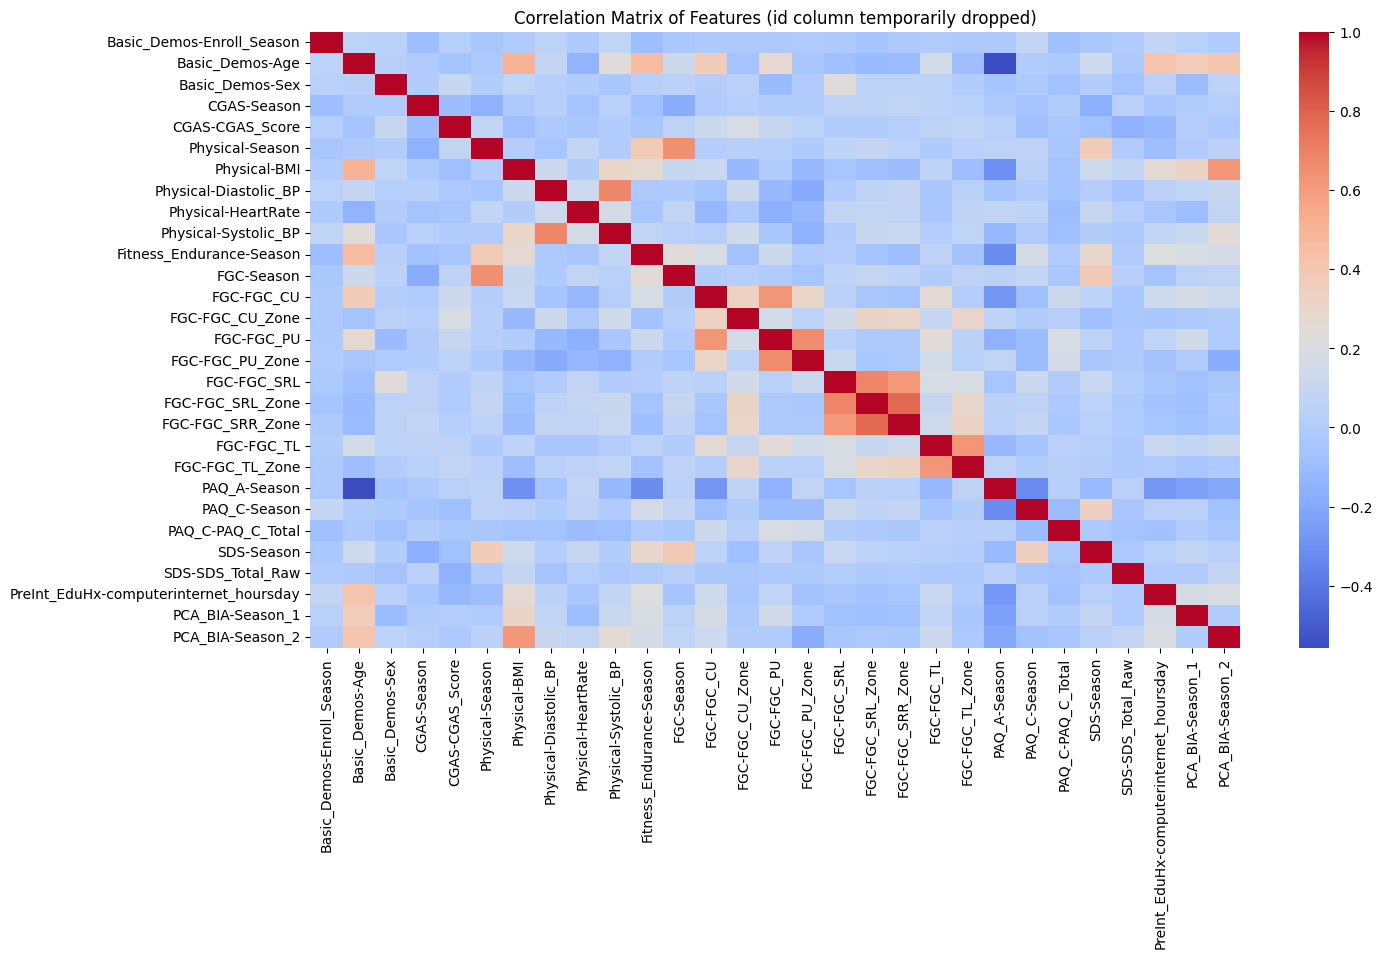

time: 858 ms (started: 2024-12-01 11:04:35 +00:00)


In [31]:
# Plot correlation matrix for merged_df
# Temporarily drop the 'id' column
temp_df = merged_df.drop('id', axis=1)

# Calculate the correlation matrix
correlation_matrix = temp_df.corr()

# Create the heatmap
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features (id column temporarily dropped)')
plt.show()

* After doing the feature engineering based on old correlation matrix, this correlation matrix is much cleaner.
* We don't have variables with very high correlation or very low variance.
* Number of features are also reduced significantly.

In [32]:
merged_df.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,FGC-FGC_TL_Zone,PAQ_A-Season,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,PreInt_EduHx-computerinternet_hoursday,id,PCA_BIA-Season_1,PCA_BIA-Season_2
0,0.0,9.0,0.0,1.0,41.0,0.0,18.469705,56.0,71.0,100.0,...,1.0,4.0,3.0,2.631,3.0,56.0,0.0,a0522c83,-0.510224,-0.172666
1,0.0,13.0,0.0,1.0,55.0,3.0,22.309013,51.0,92.0,133.0,...,1.0,4.0,3.0,1.810,0.0,53.0,1.0,4a4a0f78,1.042649,0.797940
2,0.0,12.0,0.0,3.0,60.0,0.0,19.532102,71.0,73.0,103.0,...,0.0,4.0,3.0,2.240,3.0,44.0,3.0,a8b0428d,0.976365,0.392997
3,2.0,5.0,0.0,3.0,61.0,2.0,13.515964,58.0,89.0,93.0,...,1.0,4.0,4.0,2.510,4.0,39.0,0.0,6282e693,-1.441682,-1.770756
4,0.0,7.0,0.0,3.0,60.0,3.0,16.943762,75.0,101.0,124.0,...,1.0,4.0,4.0,2.510,3.0,34.0,0.0,a4530b41,-1.117276,-1.283167


time: 46.7 ms (started: 2024-12-01 11:04:36 +00:00)


* Making sure we don't have any null values in the Merged dataset

In [33]:
pprint(merged_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               796 non-null    float64
 1   Basic_Demos-Age                         796 non-null    float64
 2   Basic_Demos-Sex                         796 non-null    float64
 3   CGAS-Season                             796 non-null    float64
 4   CGAS-CGAS_Score                         796 non-null    float64
 5   Physical-Season                         796 non-null    float64
 6   Physical-BMI                            796 non-null    float64
 7   Physical-Diastolic_BP                   796 non-null    float64
 8   Physical-HeartRate                      796 non-null    float64
 9   Physical-Systolic_BP                    796 non-null    float64
 10  Fitness_Endurance-Season                796 non-null    float6

* Info for merged_df shows that we don't have any null values in the dataset after imputation, and other feature engineering.
* Now we can merge this dataframe to the feature selection zip file datasets.
* There are 3 different zip files for feature selection: MinFC, SomeFC, EfficientFC.
  * I will use all 3 to see which one performs better and stick with the best model.

# #9. Merge Features Data Function

---


In [34]:
# Function to load and join time-series data for a given ID
def join_feature_data(merged_df, base_dir):
    # Create an empty list to store the individual DataFrames
    dfs = []
    for index, row in merged_df.iterrows():
        file_id = str(row['id'])
        file_path = os.path.join(base_dir, f"id={file_id}.csv")
        if os.path.exists(file_path):
            try:
              # Read the CSV file for the current ID
              df_id = pd.read_csv(file_path)
              # Add a new column with the ID
              df_id['id'] = file_id
              # Append the DataFrame to the list
              dfs.append(df_id)
            except Exception as e:
              print(f"Error reading file {file_path}: {e}")
        else:
          print(f"File not found for id: {file_id}")
    # Concatenate all the DataFrames into a single DataFrame
    if dfs:
        time_series_df = pd.concat(dfs, ignore_index=True)
        # Merge with the original dataframe based on the 'id' column
        merged_df = pd.merge(merged_df, time_series_df, on='id', how='left')
        return merged_df
    else:
        print("No time-series data files found.")
        return merged_df

time: 981 µs (started: 2024-12-01 11:04:36 +00:00)


* This function is used to join the existing merged_df to the feature selection data.
* This data is stored in seperate csv files for each id, the name for the file is the id of the row.
* This function will join the merged_df with the Feature selection data based on id.

* Setting a general early stopping for all the models.

# #10. Setting Batch Size and Epoch for All model

---


In [86]:
# Setting number of epochs and batch size for all models
batch = 100
num_epoch = 1000

# Define models with different L2 values
l2_value = 0.0015

time: 913 µs (started: 2024-12-01 11:15:00 +00:00)


* Setting the batch size and Epochs for all the models along with l2 for kernal regularizer

# #11. MinFC Data

---


In [36]:
# 'MinFC_results' directory
MinFC_results_dir = 'MinFC_results'

# Call the function to join time-series data
min_merged_df = join_feature_data(merged_df, MinFC_results_dir)
min_test_merged_df = join_feature_data(test_merged_df, MinFC_results_dir)
# Display the head of the merged DataFrame
print(min_merged_df.head())
print(min_test_merged_df.head())

   Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  CGAS-Season  \
0                        0.0              9.0              0.0          1.0   
1                        0.0             13.0              0.0          1.0   
2                        0.0             12.0              0.0          3.0   
3                        2.0              5.0              0.0          3.0   
4                        0.0              7.0              0.0          3.0   

   CGAS-CGAS_Score  Physical-Season  Physical-BMI  Physical-Diastolic_BP  \
0             41.0              0.0     18.469705                   56.0   
1             55.0              3.0     22.309013                   51.0   
2             60.0              0.0     19.532102                   71.0   
3             61.0              2.0     13.515964                   58.0   
4             60.0              3.0     16.943762                   75.0   

   Physical-HeartRate  Physical-Systolic_BP  ...  weekday__absolute_

* I merged the MinFC data to merged_df using the join_feature_data function which I created.

In [37]:
# Check for NaN values in merged_df
print("NaN values in merged_df:")
print(min_merged_df.isnull().sum().sum())

# Check for NaN values in test_merged_df
print("\nNaN values in test_merged_df:")
print(min_test_merged_df.isnull().sum().sum())

NaN values in merged_df:
0

NaN values in test_merged_df:
0
time: 6.87 ms (started: 2024-12-01 11:04:41 +00:00)


* There are no null values in the current min_merged_df.

## #11.1. Replacing NAN with 0



In [38]:
# Fill NaN values introduced by the conversion with 0
min_merged_df = min_merged_df.fillna(0)
min_test_merged_df = min_test_merged_df.fillna(0)
# # Replace inf and -inf with 0
min_merged_df = min_merged_df.replace([np.inf, -np.inf], 0)
min_test_merged_df = min_test_merged_df.replace([np.inf, -np.inf], 0)

time: 9.79 ms (started: 2024-12-01 11:04:41 +00:00)


* Replacing the nulls to be on the safe side.
* Replacing inf and -inf with 0.

## #11.2. Filtering the Features


In [39]:
# Ensure all columns used in feature selection are numeric
# Convert all columns to numeric, errors='coerce' will replace non-numeric values with NaN
for column in min_merged_df.columns:
    if column != 'id':
        min_merged_df[column] = pd.to_numeric(min_merged_df[column], errors='coerce')

for column in min_test_merged_df.columns:
    if column != 'id':
        min_test_merged_df[column] = pd.to_numeric(min_test_merged_df[column], errors='coerce')

# Define X_train, X_test, y_train, y_test
min_X_train = min_merged_df.drop(columns=['id'], axis=1)
min_y_train = y_train_df[['sii']]
min_X_test = min_test_merged_df.drop(columns=['id'], axis=1)
min_y_test = y_test_df[['sii']]

# Drop the extra row from y_train and y_test
min_y_train = min_y_train.iloc[:-1]
min_y_test = min_y_test.iloc[:-1]
# Match them with the ids
min_y_train = min_y_train.reset_index(drop=True)
min_y_test = min_y_test.reset_index(drop=True)

# Perform feature selection
min_features_train_filtered = select_features(min_X_train, min_y_train['sii'])

# Select features from the test set based on the selected features from the training set
min_features_test_filtered = min_X_test[min_features_train_filtered.columns]

print(min_features_train_filtered.head())
print(min_features_test_filtered.head())

   Basic_Demos-Age  PreInt_EduHx-computerinternet_hoursday  FGC-FGC_CU  \
0              9.0                                     0.0         8.0   
1             13.0                                     1.0         8.0   
2             12.0                                     3.0        10.0   
3              5.0                                     0.0         0.0   
4              7.0                                     0.0         1.0   

   PCA_BIA-Season_1  enmo__root_mean_square  enmo__variance  \
0         -0.510224                0.081017        0.005913   
1          1.042649                0.111455        0.011247   
2          0.976365                0.052506        0.001862   
3         -1.441682                0.185004        0.026763   
4         -1.117276                0.128188        0.014222   

   enmo__standard_deviation  Physical-BMI  enmo__mean  enmo__sum_values  ...  \
0                  0.076896     18.469705    0.025508      10219.507565  ...   
1               

* Converted all the columns to numeric except id.
* Dropped id from all X and y, train and test dataframes.
* Using select_features, it chose 25 features of 181 for model.

In [40]:
min_features_train_filtered.shape, min_y_train.shape, min_features_test_filtered.shape, min_y_test.shape

((796, 25), (796, 1), (200, 25), (200, 1))

time: 8.17 ms (started: 2024-12-01 11:04:41 +00:00)


In [41]:
min_features_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         796 non-null    float64
 1   PreInt_EduHx-computerinternet_hoursday  796 non-null    float64
 2   FGC-FGC_CU                              796 non-null    float64
 3   PCA_BIA-Season_1                        796 non-null    float64
 4   enmo__root_mean_square                  796 non-null    float64
 5   enmo__variance                          796 non-null    float64
 6   enmo__standard_deviation                796 non-null    float64
 7   Physical-BMI                            796 non-null    float64
 8   enmo__mean                              796 non-null    float64
 9   enmo__sum_values                        796 non-null    float64
 10  PCA_BIA-Season_2                        796 non-null    float6

## #11.3. Scaling and SMOTE Sampling


In [42]:
# MinMax Scaling
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform
min_X_train_scaled = scaler.fit_transform(min_features_train_filtered)

# Transform the test data using the same scaler
min_X_test_scaled = scaler.transform(min_features_test_filtered)

# SMOTE on Training Dataset
min_smote = SMOTE(random_state=42)
min_X_train_smote, min_y_train_smote = min_smote.fit_resample(min_X_train_scaled, min_y_train)

time: 113 ms (started: 2024-12-01 11:04:41 +00:00)


* I used MinMaxScaler to scale the dataframe.
* I used SMOTE sampling on the scaled dataset to avoid overfitting and make predictions better.

In [43]:
min_X_train_scaled.shape, min_y_train.shape, min_X_test_scaled.shape, min_y_test.shape

((796, 25), (796, 1), (200, 25), (200, 1))

time: 4.56 ms (started: 2024-12-01 11:04:42 +00:00)


In [44]:
min_X_train_smote.shape, min_y_train_smote.shape

((926, 25), (926, 1))

time: 3.57 ms (started: 2024-12-01 11:04:42 +00:00)


## #11.4. Model

### #11.4.1. Define Model

In [87]:
# Create a dense neural network model
min_model = Sequential()
min_model.add(Dense(512, activation='relu', input_shape=(min_X_train_smote.shape[1],), kernel_regularizer=l2(l2_value)))
min_model.add(Dropout(0.3)) # Dropout rate
min_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
min_model.add(Dropout(0.3))
min_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
min_model.add(Dropout(0.3))
min_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
min_model.add(Dropout(0.3))
min_model.add(Dense(1, activation='sigmoid'))  # Output layer for classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


time: 265 ms (started: 2024-12-01 11:15:04 +00:00)


* Used Dense Neural Network since I was dealing with tabular data instead of temporal data.
* Tried multiple variations of the layers and this model performed better as compared to others.
* Used L2 regularization (to prevent overfitting) and a 20% dropout rate after each hidden layer are employed to improve generalization.
* A single neuron with a sigmoid activation function is used for binary classification, outputting probabilities between 0 and 1.


In [88]:
K.clear_session()

time: 725 ms (started: 2024-12-01 11:15:06 +00:00)


* Cleared the session before running the model to clear temporary memory and run model without existing cache.

### #11.4.2. Compile the Model



In [89]:
# Compile the model
min_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
min_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          13,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801,793 (3.06 MB)

 Trainable params: 801,793 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

time: 144 ms (started: 2024-12-01 11:15:07 +00:00)


* Compiled a model for MinFC with Adam optimizer.
* Since we are dealing with 0-1 classification, I used binary_crossentropy as loss and accuracy as my metric.
* Printed the summary for min_model.

### #11.4.3. Fit Model

In [90]:
# Define early stopping callback
min_early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=30,
                               restore_best_weights=True)

# Fit the model with early stopping
min_history = min_model.fit(min_X_train_smote, min_y_train_smote['sii'],
                           validation_data=(min_X_test_scaled, min_y_test),
                           epochs=num_epoch,
                           batch_size=batch,
                           verbose=1,
                           callbacks=[min_early_stopping])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step - accuracy: 0.5241 - loss: 2.9035 - val_accuracy: 0.6800 - val_loss: 2.3875
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6338 - loss: 2.2909 - val_accuracy: 0.6800 - val_loss: 1.9167
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6792 - loss: 1.8420 - val_accuracy: 0.6800 - val_loss: 1.5691
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6871 - loss: 1.5240 - val_accuracy: 0.6950 - val_loss: 1.3358
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6834 - loss: 1.3186 - val_accuracy: 0.7000 - val_loss: 1.1604
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7040 - loss: 1.1241 - val_accuracy: 0.6800 - val_loss: 1.0535
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6913 - loss: 1.0434 - val_accuracy: 0.7200 - val_loss: 0.9473
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6784 - loss: 0.9690 - val_acc

* **Early Stopping:** The training process monitors the validation accuracy and stops after 50 consecutive epochs without improvement, ensuring efficient use of resources and preventing overfitting.
* **Validation Setup:** The min_model is validated using a separate test dataset (min_X_test_scaled and min_y_test) to track performance during training.
* **Restore Best Weights:** Automatically restores the min_model's weights to the epoch with the highest validation accuracy, ensuring the best min_model configuration is retained.
* **Batch Size and Epochs:** The min_model is trained with a batch size of 1 and up to 1000 epochs, leveraging the early stopping mechanism to halt training early if performance plateaus.

## #11.5. Results


In [99]:
# Evaluate the model
min_loss, min_accuracy = min_model.evaluate(min_X_test_scaled, min_y_test)

# Make predictions on the test set
min_y_pred = min_model.predict(min_X_test_scaled)
min_y_pred_classes = (min_y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Weighted F1-Score
min_f1 = f1_score(min_y_test, min_y_pred_classes, average='weighted')

# Print the Results
print("Weighted F1 Score:", min_f1)
print(f"Test Loss: {min_loss:.4f}")
print(f"Test Accuracy: {min_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7441 - loss: 0.6791 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Weighted F1 Score: 0.748178650617675
Test Loss: 0.6420
Test Accuracy: 0.7500
time: 362 ms (started: 2024-12-01 11:17:52 +00:00)


* Print loss, accuracy and weighted f1-score.
* The predictions were made on the test dataset.

In [100]:
# Classification Report
print(classification_report(min_y_test, min_y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       120
         1.0       0.70      0.65      0.68        80

    accuracy                           0.75       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.75      0.75      0.75       200

time: 67.9 ms (started: 2024-12-01 11:17:58 +00:00)


* Printed the classification report. The classification report shows the weighted f1-score of 0.75.
* The min_model got 1.0 recall of 0.65 and 0.0 recall of 0.82.
* True positive of 52 and True negative of 98. False positives of 22 and false negative of 28.

## #11.6. Plots

### #11.6.1. Confusion Matrix

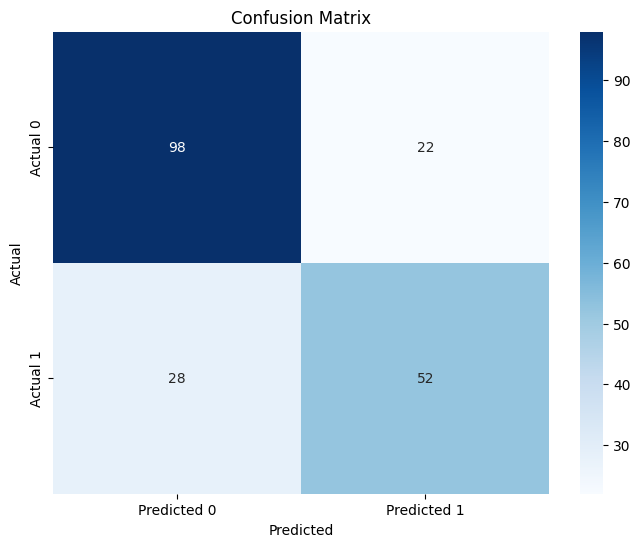

time: 507 ms (started: 2024-12-01 11:18:27 +00:00)


In [102]:
# Confusion Matrix
min_cm = confusion_matrix(min_y_test, min_y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(min_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* The model performs well in identifying true negatives, with 98 out of 120 actual negatives correctly classified.
* Reasonable detection of true positives (52 out of 80 actual positives).
* The model has room for improvement in reducing false negatives (28 instances), as these are missed detections that could impact performance in critical applications.
* The 22 false positives indicate the model sometimes over-predicts positive outcomes.

### #11.6.2. History Plot

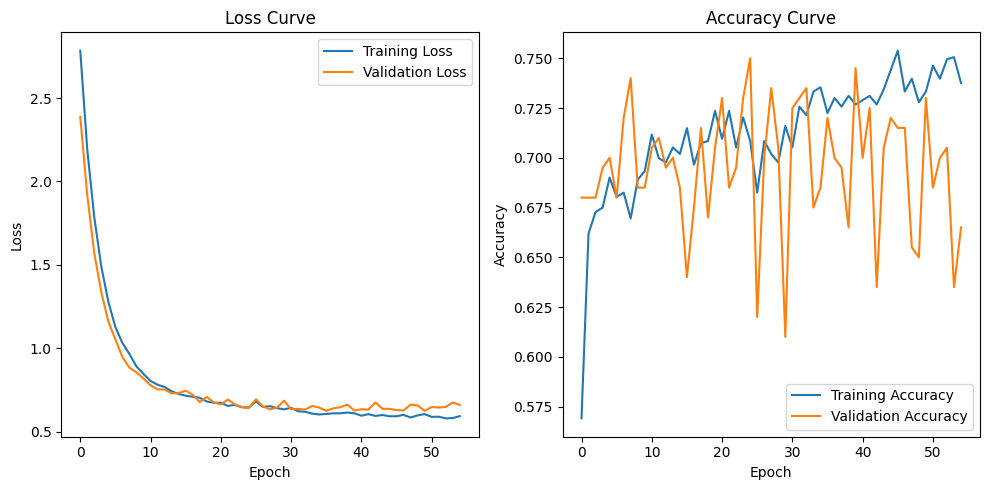

time: 866 ms (started: 2024-12-01 11:18:31 +00:00)


In [103]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(min_history.history['loss'], label='Training Loss')
plt.plot(min_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(min_history.history['accuracy'], label='Training Accuracy')
plt.plot(min_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

* In the loss curve, there is a steady decrease in both training and validation as well. It suggests that the model is learning with each epoch and it's minimizing error.
* The Accuracy curve suggests, the validation dataset might have some noise as compared to the training dataset, suggesting it's sensitive to the validation dataset.

### #11.6.3. Permutation Importance Plot

In [158]:
# Wrap Keras model to make it compatible with scikit-learn
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model, threshold=0.5):
        self.keras_model = keras_model
        self.threshold = threshold
        # Add classes_ attribute during initialization
        self.classes_ = [0, 1]  # Binary classification with labels 0 and 1

    def fit(self, X, y):
        return self  # No-op since the model is pre-trained

    def predict(self, X):
        # Return binary predictions
        return (self.keras_model.predict(X) > self.threshold).astype(int).flatten()
    def predict_proba(self, X):
        # Return probability predictions for compatibility
        return np.hstack([1 - self.keras_model.predict(X), self.keras_model.predict(X)])

# Wrap the min_model
wrapped_model = KerasClassifierWrapper(keras_model=min_model)

# Ensure that min_y_test is binary
min_y_test_binary = min_y_test.astype(int)

# Calculate Permutation Importance
result = permutation_importance(
    wrapped_model,
    min_X_test_scaled,
    min_y_test_binary,  # Binary test labels
    scoring="accuracy",
    n_repeats=10,
    random_state=42
)

# Extract and sort feature importance
feature_importance = result.importances_mean
sorted_idx = np.argsort(feature_importance)[-5:]  # Select top 5 features
sorted_idx_t10 = np.argsort(feature_importance)[-10:]  # Select top 10 features

feature_names = min_features_train_filtered.columns  # Get column names from original DataFrame

# Fetching top 5 features in a list to build an efficient model
top_5_features = [feature_names[i] for i in sorted_idx]
# Fetching top 10 features in a list to build an efficient model
top_10_features = [feature_names[i] for i in sorted_idx_t10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━

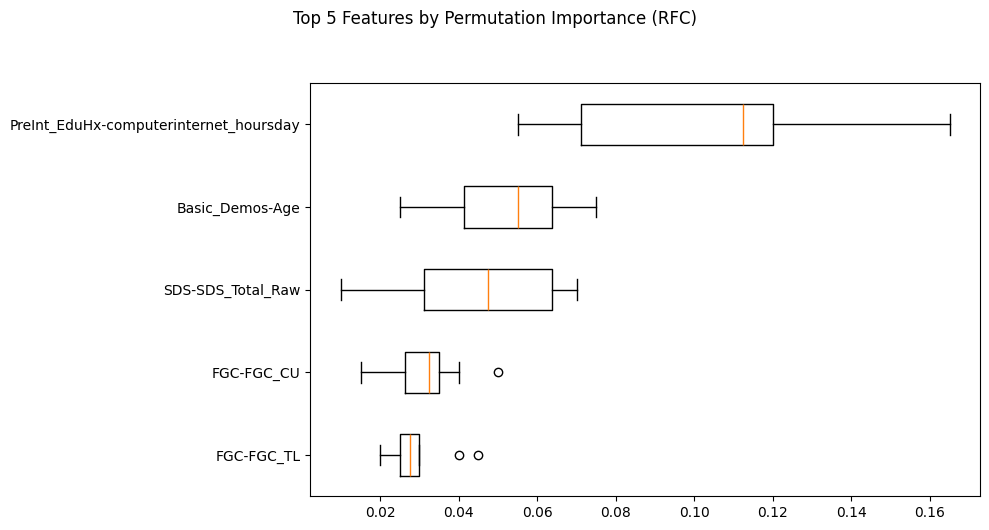

time: 869 ms (started: 2024-12-01 12:49:57 +00:00)


In [166]:
# Plot the top 5 features as a boxplot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.boxplot(result.importances[sorted_idx].T, vert=False,
            labels=[feature_names[i] for i in sorted_idx])
fig.suptitle('Top 5 Features by Permutation Importance (RFC)', y=1.05)

fig.tight_layout()
plt.show()

* **PreInt_EduHx-computerinternet_hoursday** has the highest importance.
  * It significantly influences the model's predictions, as indicated by the large mean importance and wide range of variability.
  * This feature represents the Internet use in hours.
* **Basic_Demos-Age** is the second most important feature.
  * Its importance indicates that age plays a key role in the target predictions.
* **SDS-SDS_Total_Raw** ranks third.
  * This feature likely captures raw survey data related to Sleep Disturbance Scale, further highlighting its role in predictions.
* **FGC-FGC_CU** and **FGC-FGC_TL** have smaller importance values compared to the top three but are still influential.


### #11.6.4. Partial Dependence Plot

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━

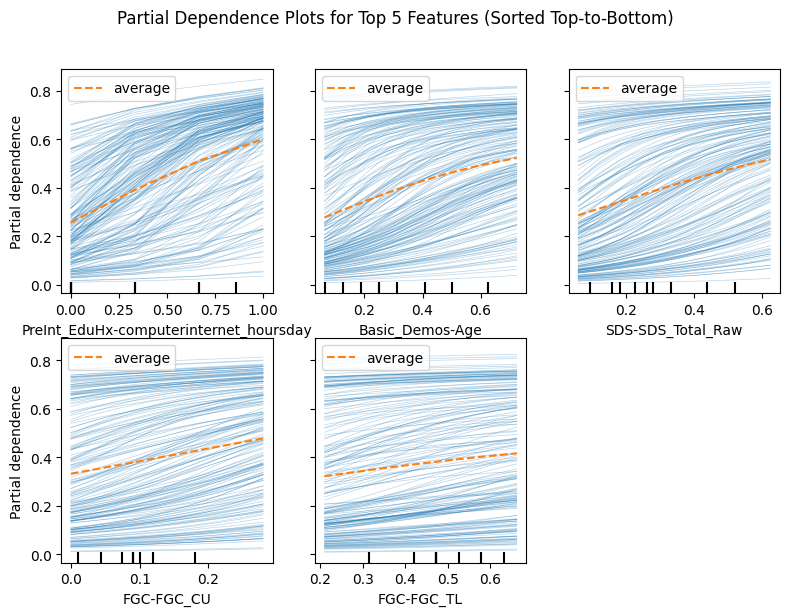

time: 22.4 s (started: 2024-12-01 12:48:08 +00:00)


In [163]:
# Ensure feature indices for the top 5 features
top_5_feature_indices = [
    list(min_features_train_filtered.columns).index(feature)
    for feature in reversed(top_5_features)  # Reverse the order for top-to-bottom sorting
]

# Plot Partial Dependence for the top 5 features
fig, ax = plt.subplots(figsize=(8, 6))

PartialDependenceDisplay.from_estimator(
    wrapped_model,  # Wrapped Keras model
    min_X_test_scaled,  # Scaled test features
    features=top_5_feature_indices,  # Indices of the top 5 features
    feature_names=min_features_train_filtered.columns,  # Provide feature names for display
    kind="both",  # Plot average dependencies
    grid_resolution=10,  # Number of grid points for smoother curves
    ax=ax,
)

fig.suptitle("Partial Dependence Plots for Top 5 Features (Sorted Top-to-Bottom)", y=1.02)
plt.tight_layout()
plt.show()

* **PreInt_EduHx-computerinternet_hoursday:** Increased computer/internet usage is strongly linked to higher predicted severity impairment (SII).
* **Basic_Demos-Age:** Older individuals are predicted to have higher SII scores.
* **SDS-SDS_Total_Raw:** Higher survey raw scores for Sleep Distarbance Scale significantly increase the likelihood of higher SII predictions.
* **FGC-FGC_CU** and **FGC-FGC_TL:** Both show a modest positive relationship with SII, with higher values slightly increasing severity predictions.

### #11.6.5. Shap Plot Overall

PermutationExplainer explainer: 201it [06:18,  1.92s/it]


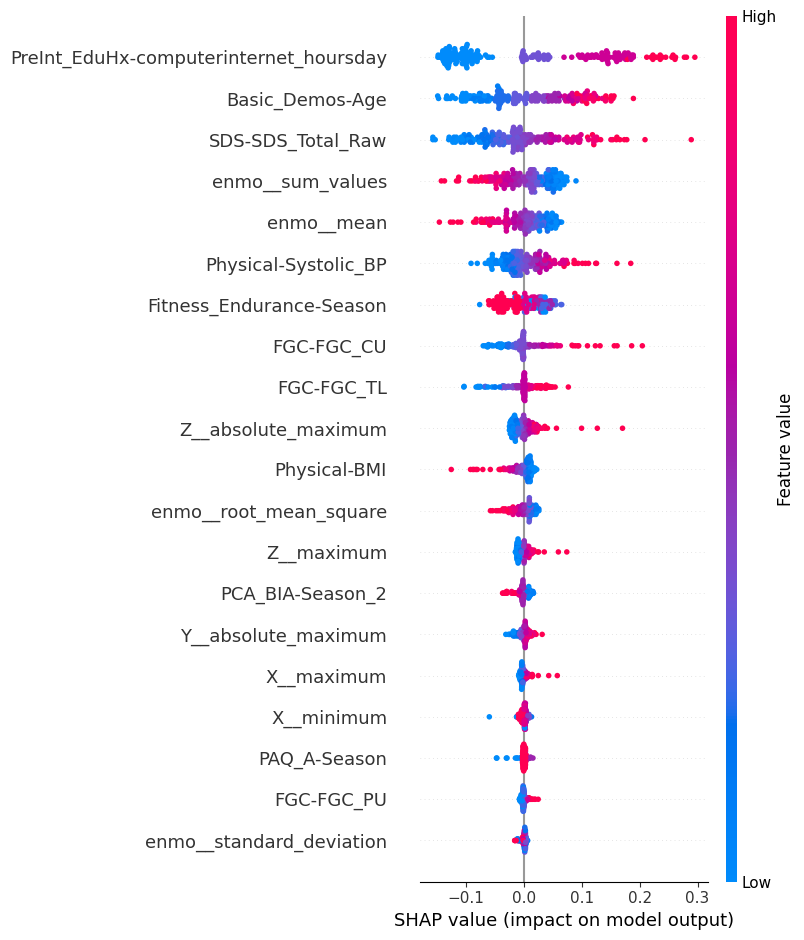

time: 6min 20s (started: 2024-12-01 13:29:14 +00:00)


In [173]:
# Ensure min_X_test_scaled is a DataFrame with appropriate column names
if isinstance(min_X_test_scaled, np.ndarray):
    min_X_test_scaled = pd.DataFrame(min_X_test_scaled, columns=min_features_train_filtered.columns)

# Create a SHAP explainer
explainer = shap.Explainer(min_model, min_X_test_scaled)

# Calculate SHAP values
shap_values = explainer(min_X_test_scaled)

# Create SHAP summary plot
shap.summary_plot(shap_values, min_X_test_scaled)

* **PreInt_EduHx-computerinternet_hoursday:** This feature has the highest impact on the model's predictions. Higher internet usage (indicated by the pink values) strongly increases the likelihood of higher SII predictions.
* **Basic_Demos-Age:** Older ages (pink) increase SII predictions, while younger ages (blue) reduce them.
* **SDS-SDS_Total_Raw:** Higher survey raw scores consistently contribute to higher SII predictions.
* **enmo__sum_values** and **Physical-Systolic_BP:** These features also show moderate influence, with both high and low values impacting predictions in varied ways.
* **FGC-FGC_CU** and **FGC-FGC_TL:** These features have smaller yet consistent impacts, with higher values slightly increasing the SII predictions.

### #11.6.6. Shap Plot for Top Feature

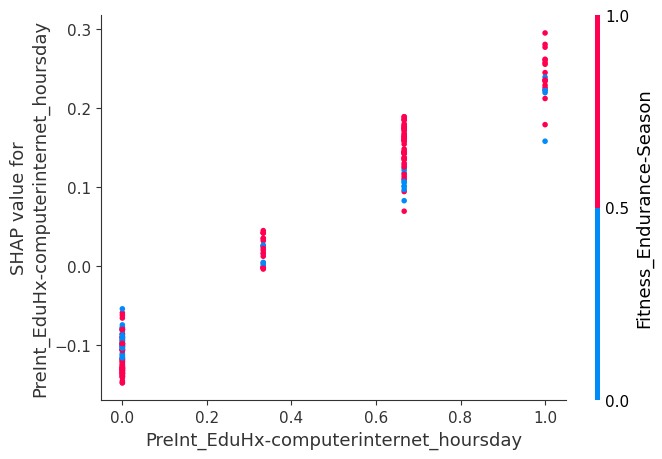

time: 909 ms (started: 2024-12-01 13:41:13 +00:00)


In [176]:
# Create SHAP dependence plot for a specific feature
shap.dependence_plot("PreInt_EduHx-computerinternet_hoursday", shap_values.values, min_X_test_scaled)

* Participants who spend more time on the computer/internet (e.g., values 2 and 3) are associated with higher SHAP values, suggesting a greater likelihood of problematic internet use.
* Lower usage (e.g., values 0 and 1) generally contributes less or even negatively to the prediction, implying less problematic behavior.
* The color overlay hints that the feature Fitness_Endurance-Season modifies the impact of internet use on the target variable.

# #12. Business Recommendation
---

> Why is the model predicting the way it does?
* **Key Driver of Predictions:** PreInt_EduHx-computerinternet_hoursday (Internet Usage Hours/Day), Basic Demos-Age, and SDS-SDS_Total_Raw were selected as most influential features for this model. In general sense, it does make sense to have these variables as top predictors for problematic internet usage.

> What things I captured in the model / Which set of predictors I used?
* I removed the non-essential or high correlation variables, imputed the rest of the dataset using TSFresh to keep quality and integrity of the selected columns.
* I tried keeping as many of demographic features as I could to get better insight on the psychological and behavioral patterns.
* Instead of using Kitchen sink model, I used select_features function of TSFresh and kept only important features.

> What is driving my model?
* Majorly, **TSFresh**!!! Majority of data preprocessing and feature engineering was done using TSFresh.
* Secondly, I did take care of the features based on the correlation plot.
* SMOTE sampling and MinMaxScaler certainly helped the model avoid overfitting.
* Dense Neural Network was my final model as all my data was tabular. Thanks to Dr. Dave, he gave all of us hand in creating the dataframe from parquet files.
* The top features are listed in 11.6.3 was certainly major features driving my model towards mid 70's

> What is causing the internet usage problem?
* **Internet Usage per Hour (PreInt_EduHx-computerinternet_hoursday):** Higher internet usage is the most crucial predictor for predicting problematic usage. Children spending 2+ hours are more likely to face challenges in severity impairment.
* **Age:** Younger kids are more likely to be flagged as problematic users due to excessive internet engagement and lack of self-control.
* **Psychological Scores (SDS-SDS_Total_Raw):** Higher Sleep Disturbance Score correlates to the problematic internet usage in children.
* **FGC-FGC_TL** and **FGC-FGC_CU:** These features are capturing the fitness metrics of the children. Lower fitness values leads to the problematic internet usage.

> Do we need the detailed time series data or just Demographic Data?
* Not necessarily, using TSFresh we derived all the features we could using extract_features and we are capturing good amount of information through tabular data.
* But we could experiment and try to incorporate the temporal data to get additional granularity. But due to the time constraint and model complexity, I decided to not include the time series data. As per my observation, we would have gotten better results with time series data.
* Just the demographic data from the competition was providing a lot of information. So I think we were able to get enough information through just Demographics data.

> **Final Recommendation:**
* **Educational Campaigns:** Focus on younger age group and spread awareness through promoting healthy habits.
* **Physical Activity Programs:** Encouraging outdoor sports is a great idea. Be enthusiastic about their interests in outdoor games and let them explore camps and programs which would counteract their sedentary lifestyle.
* As discussed above, introducing temporal data might improve the model accuracy as it will give us exact interventions.
* Monitor and keep refining the top 5 variables to improve the recall.
* **Awareness in Parents:** We should spread awareness into parents based on the top features, so that they could keep an eye out for such bevioral patterns and take controlled decisions. Instead of looking all over the place, our model gives them exctly what patterns to look for.



# #13. Conclusion
---
Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.

* This Kaggle competition was a real eye-opener on how a project could go out of hand and how to pivot from strategies to get to the optimized results. It was also interesting to work with TSFresh library. This was the first time I used it.
* This was the first time I actually worked with Parquet files. Even though I had an understanding of such files, I never came accross such files till now and it was certainly one of the important lessons I learned, how to deal with parquet files. Even though they were simple and similar to csv, initially they were overwhelming to work with. Once I got a hang of it, then it certainly got much better.
* Real-world data could be messy. Throughout my semesters at BAPM, I have been reminded again and again how important it is to preprocess the data and take care of imputation, dealing with outliers, methods like .impute from TSFresh. All of these strategies are an integral part of the Data Science.
* Along with Preprocessing, feature engineering is similarly important. I learned a new way in to take care of the variables with high correlation or low variance or even doing PCA on few of the variables with high correlation. This was fun to work with.
* Above all, I learned to keep my notebook organized and develop the model methodically. Instead of shooting in the blind, this is a good practice to keep your code organized in such a way that even a random person with very little data science background or a person from business background should be able to read your code and understand what's going on in each line of code.

# Appendix

---

## #Model-1. SomeFC



In [53]:
# 'SomeFC_results' directory
SomeFC_results_dir = 'SomeFC_results'

# Call the function to join time-series data
Some_merged_df = join_feature_data(merged_df, SomeFC_results_dir)
Some_test_merged_df = join_feature_data(test_merged_df, SomeFC_results_dir)
# Display the head of the merged DataFrame
print(Some_merged_df.head())
print(Some_test_merged_df.head())

   Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  CGAS-Season  \
0                        0.0              9.0              0.0          1.0   
1                        0.0             13.0              0.0          1.0   
2                        0.0             12.0              0.0          3.0   
3                        2.0              5.0              0.0          3.0   
4                        0.0              7.0              0.0          3.0   

   CGAS-CGAS_Score  Physical-Season  Physical-BMI  Physical-Diastolic_BP  \
0             41.0              0.0     18.469705                   56.0   
1             55.0              3.0     22.309013                   51.0   
2             60.0              0.0     19.532102                   71.0   
3             61.0              2.0     13.515964                   58.0   
4             60.0              3.0     16.943762                   75.0   

   Physical-HeartRate  Physical-Systolic_BP  ...  \
0               

In [54]:
# Check for NaN values in merged_df
print("NaN values in merged_df:")
print(Some_merged_df.isnull().sum().sum())

# Check for NaN values in test_merged_df
print("\nNaN values in test_merged_df:")
print(Some_test_merged_df.isnull().sum().sum())

NaN values in merged_df:
0

NaN values in test_merged_df:
0
time: 12.6 ms (started: 2024-12-01 11:06:17 +00:00)


### #M1.1. Replacing NAN with 0




In [55]:
# Fill NaN values introduced by the conversion with 0
Some_merged_df = Some_merged_df.fillna(0)
Some_test_merged_df = Some_test_merged_df.fillna(0)

# Replace inf and -inf with 0
Some_merged_df = Some_merged_df.replace([np.inf, -np.inf], 0)
Some_test_merged_df = Some_test_merged_df.replace([np.inf, -np.inf], 0)

time: 48.5 ms (started: 2024-12-01 11:06:17 +00:00)


### #M1.2. Filtering the Features




In [56]:
# Ensure all columns used in feature selection are numeric
# Convert all columns to numeric, errors='coerce' will replace non-numeric values with NaN
for column in Some_merged_df.columns:
    if column != 'id':
        Some_merged_df[column] = pd.to_numeric(Some_merged_df[column], errors='coerce')

for column in Some_test_merged_df.columns:
    if column != 'id':
        Some_test_merged_df[column] = pd.to_numeric(Some_test_merged_df[column], errors='coerce')

Some_X_train = Some_merged_df.drop(columns=['id'], axis=1)
Some_y_train = y_train_df[['sii']]
Some_X_test = Some_test_merged_df.drop(columns=['id'], axis=1)
Some_y_test = y_test_df[['sii']]

# Drop the extra row from y_train and y_test
Some_y_train = Some_y_train.iloc[:-1]
Some_y_test = Some_y_test.iloc[:-1]
# Match them with the ids
Some_y_train = Some_y_train.reset_index(drop=True)
Some_y_test = Some_y_test.reset_index(drop=True)

# Perform feature selection
Some_features_train_filtered = select_features(Some_X_train, Some_y_train['sii'])

# Select features from the test set based on the selected features from the training set
Some_features_test_filtered = Some_X_test[Some_features_train_filtered.columns]

print(Some_features_train_filtered.head())
print(Some_features_test_filtered.head())

   Basic_Demos-Age  PreInt_EduHx-computerinternet_hoursday  FGC-FGC_CU  \
0              9.0                                     0.0         8.0   
1             13.0                                     1.0         8.0   
2             12.0                                     3.0        10.0   
3              5.0                                     0.0         0.0   
4              7.0                                     0.0         1.0   

   PCA_BIA-Season_1  enmo__spkt_welch_density__coeff_2  enmo__c3__lag_2  \
0         -0.510224                           0.022902         0.000047   
1          1.042649                           0.055742         0.000082   
2          0.976365                           0.000331         0.000017   
3         -1.441682                           0.056333         0.000682   
4         -1.117276                           0.057786         0.000219   

   enmo__c3__lag_3  enmo__number_crossing_m__m_1  \
0         0.000032                           0.0   


In [57]:
Some_features_train_filtered.shape, Some_y_train.shape, Some_features_test_filtered.shape, Some_y_test.shape

((796, 47), (796, 1), (200, 47), (200, 1))

time: 5.54 ms (started: 2024-12-01 11:06:22 +00:00)


### #M1.3. Scaling and SMOTE Sampling



In [58]:
# MinMaxScaling
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform
Some_X_train_scaled = scaler.fit_transform(Some_features_train_filtered)

# Transform the test data using the same scaler
Some_X_test_scaled = scaler.transform(Some_features_test_filtered)

# SMOTE on Training Dataset
Some_smote = SMOTE(random_state=42)
Some_X_train_smote, Some_y_train_smote = Some_smote.fit_resample(Some_X_train_scaled, Some_y_train)

time: 51 ms (started: 2024-12-01 11:06:22 +00:00)


In [59]:
Some_X_train_scaled.shape, Some_y_train.shape, Some_X_test_scaled.shape, Some_y_test.shape

((796, 47), (796, 1), (200, 47), (200, 1))

time: 5.27 ms (started: 2024-12-01 11:06:22 +00:00)


In [60]:
Some_X_train_smote.shape, Some_y_train_smote.shape

((926, 47), (926, 1))

time: 5.26 ms (started: 2024-12-01 11:06:22 +00:00)


### #M1.4. Models



#### M1.4.1. Define Model

In [104]:
# Create a dense neural network model
Some_model = Sequential()
Some_model.add(Dense(512, activation='relu', input_shape=(Some_X_train_smote.shape[1],), kernel_regularizer=l2(l2_value)))
Some_model.add(Dropout(0.3))
Some_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
Some_model.add(Dropout(0.3))
Some_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
Some_model.add(Dropout(0.3))
Some_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
Some_model.add(Dropout(0.3))
Some_model.add(Dense(1, activation='sigmoid'))  # Output layer for classification

time: 206 ms (started: 2024-12-01 11:18:50 +00:00)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
K.clear_session()

time: 741 ms (started: 2024-12-01 11:18:52 +00:00)


#### #M.1.4.2. Compile the Model

In [106]:
# Compile the model
Some_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Some_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,057 (3.10 MB)

 Trainable params: 813,057 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

time: 41.8 ms (started: 2024-12-01 11:18:53 +00:00)


#### #M1.4.3. Fit Model



In [107]:
# Define early stopping callback
Some_early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=40,
                               restore_best_weights=True)

# Fit the model with early stopping
Some_history = Some_model.fit(Some_X_train_smote, Some_y_train_smote['sii'],
                           validation_data=(Some_X_test_scaled, Some_y_test),
                           epochs=num_epoch,
                           batch_size=batch,
                           verbose=1,
                           callbacks=[Some_early_stopping])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5630 - loss: 2.9669 - val_accuracy: 0.6450 - val_loss: 2.4658
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6565 - loss: 2.3746 - val_accuracy: 0.6900 - val_loss: 2.0003
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6637 - loss: 1.9467 - val_accuracy: 0.7050 - val_loss: 1.6709
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6718 - loss: 1.6379 - val_accuracy: 0.6950 - val_loss: 1.4291
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6620 - loss: 1.4441 - val_accuracy: 0.6250 - val_loss: 1.3229
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6763 - loss: 1.2514 - val_accuracy: 0.7000 - val_loss: 1.1512
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6988 - loss: 1.1259 - val_accuracy: 0.6950 - val_loss: 1.0378
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6757 - loss: 1.0594 - val_accu

### #M1.5. Results



In [108]:
# Evaluate the model
Some_loss, Some_accuracy = Some_model.evaluate(Some_X_test_scaled, Some_y_test)

# Make predictions on the test set
Some_y_pred = Some_model.predict(Some_X_test_scaled)
Some_y_pred_classes = (Some_y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Weighted F1-Score
Some_f1 = f1_score(Some_y_test, Some_y_pred_classes, average='weighted')

# Print the Results
print("Weighted F1 Score:", Some_f1)
print(f"Test Loss: {Some_loss:.4f}")
print(f"Test Accuracy: {Some_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7001 - loss: 0.6716  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Weighted F1 Score: 0.7208748897029332
Test Loss: 0.6319
Test Accuracy: 0.7250
time: 494 ms (started: 2024-12-01 11:19:36 +00:00)


In [109]:
# Classification Report
print(classification_report(Some_y_test, Some_y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       120
         1.0       0.68      0.59      0.63        80

    accuracy                           0.72       200
   macro avg       0.71      0.70      0.71       200
weighted avg       0.72      0.72      0.72       200

time: 12.5 ms (started: 2024-12-01 11:19:36 +00:00)


### #M1.6. Plots


#### #M1.6.1. Confusion Matrix

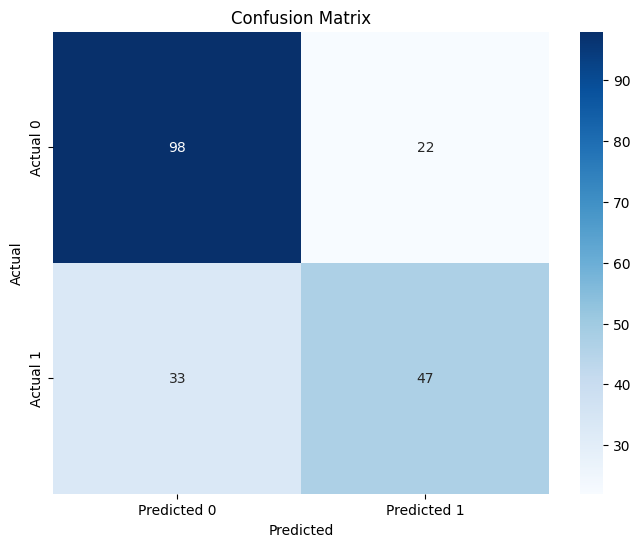

time: 253 ms (started: 2024-12-01 11:19:37 +00:00)


In [110]:
# Confusion Matrix
Some_cm = confusion_matrix(Some_y_test, Some_y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(Some_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### #M1.6.2. History Plot

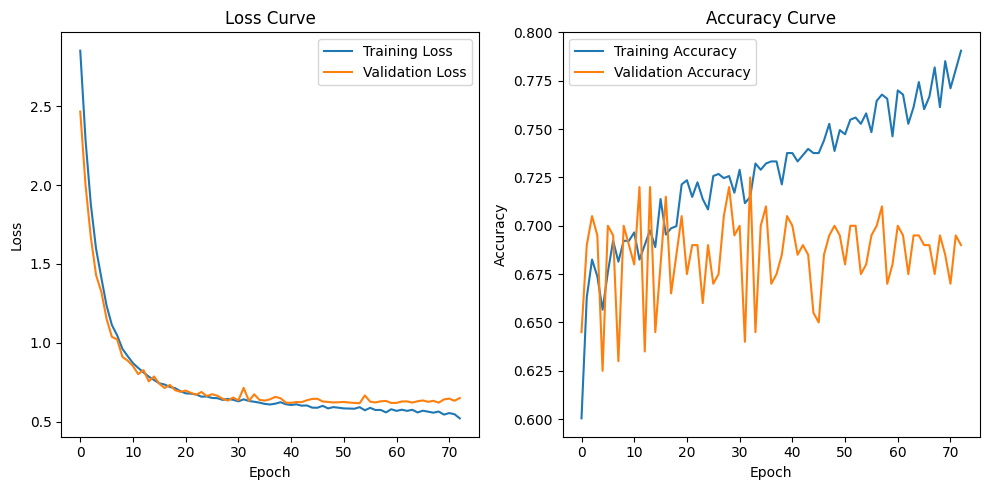

time: 547 ms (started: 2024-12-01 11:19:37 +00:00)


In [111]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(Some_history.history['loss'], label='Training Loss')
plt.plot(Some_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(Some_history.history['accuracy'], label='Training Accuracy')
plt.plot(Some_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

## #Model-2. EfficientFC

In [69]:
# 'EfficientFC_results' directory
EffFC_results_dir = 'EfficientFC_results'

# Call the function to join time-series data
Eff_merged_df = join_feature_data(merged_df, EffFC_results_dir)
Eff_test_merged_df = join_feature_data(test_merged_df, EffFC_results_dir)
# Display the head of the merged DataFrame
print(Eff_merged_df.head())
print(Eff_test_merged_df.head())

Error reading file EfficientFC_results/id=082df556.csv: No columns to parse from file
   Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  CGAS-Season  \
0                        0.0              9.0              0.0          1.0   
1                        0.0             13.0              0.0          1.0   
2                        0.0             12.0              0.0          3.0   
3                        2.0              5.0              0.0          3.0   
4                        0.0              7.0              0.0          3.0   

   CGAS-CGAS_Score  Physical-Season  Physical-BMI  Physical-Diastolic_BP  \
0             41.0              0.0     18.469705                   56.0   
1             55.0              3.0     22.309013                   51.0   
2             60.0              0.0     19.532102                   71.0   
3             61.0              2.0     13.515964                   58.0   
4             60.0              3.0     16.943762          

In [70]:
# Check for NaN values in merged_df
print("NaN values in merged_df:")
print(Eff_merged_df.isnull().sum().sum())

# Check for NaN values in test_merged_df
print("\nNaN values in test_merged_df:")
print(Eff_test_merged_df.isnull().sum().sum())

NaN values in merged_df:
10878

NaN values in test_merged_df:
0
time: 54.2 ms (started: 2024-12-01 11:11:58 +00:00)


### #M2.1. Replacing NAN with 0


In [71]:
# Fill NaN values introduced by the conversion with 0
Eff_merged_df = Eff_merged_df.fillna(0)
Eff_test_merged_df = Eff_test_merged_df.fillna(0)

# Replace inf and -inf with 0
Eff_merged_df = Eff_merged_df.replace([np.inf, -np.inf], 0)
Eff_test_merged_df = Eff_test_merged_df.replace([np.inf, -np.inf], 0)

time: 258 ms (started: 2024-12-01 11:11:58 +00:00)


### #M2.2. Filtering the Features



In [72]:
# Ensure all columns used in feature selection are numeric
# Convert all columns to numeric, errors='coerce' will replace non-numeric values with NaN
for column in Eff_merged_df.columns:
    if column != 'id':
        Eff_merged_df[column] = pd.to_numeric(Eff_merged_df[column], errors='coerce')

for column in Eff_test_merged_df.columns:
    if column != 'id':
        Eff_test_merged_df[column] = pd.to_numeric(Eff_test_merged_df[column], errors='coerce')

Eff_X_train = Eff_merged_df.drop(columns=['id'], axis=1)
Eff_y_train = y_train_df[['sii']]
Eff_X_test = Eff_test_merged_df.drop(columns=['id'], axis=1)
Eff_y_test = y_test_df[['sii']]

# Drop the extra row from y_train and y_test
Eff_y_train = Eff_y_train.iloc[:-1]
Eff_y_test = Eff_y_test.iloc[:-1]
# Match them with the ids
Eff_y_train = Eff_y_train.reset_index(drop=True)
Eff_y_test = Eff_y_test.reset_index(drop=True)

# Perform feature selection
Eff_features_train_filtered = select_features(Eff_X_train, Eff_y_train['sii'])

# Select features from the test set based on the selected features from the training set
Eff_features_test_filtered = Eff_X_test[Eff_features_train_filtered.columns]

print(Eff_features_train_filtered.head())
print(Eff_features_test_filtered.head())

   Basic_Demos-Age  PreInt_EduHx-computerinternet_hoursday  FGC-FGC_CU  \
0              9.0                                     0.0         8.0   
1             13.0                                     1.0         8.0   
2             12.0                                     3.0        10.0   
3              5.0                                     0.0         0.0   
4              7.0                                     0.0         1.0   

   PCA_BIA-Season_1  enmo__spkt_welch_density__coeff_2  enmo__c3__lag_2  \
0         -0.510224                           0.022902         0.000047   
1          1.042649                           0.055742         0.000082   
2          0.976365                           0.000331         0.000017   
3         -1.441682                           0.056333         0.000682   
4         -1.117276                           0.057786         0.000219   

   enmo__number_crossing_m__m_1  \
0                           0.0   
1                           4.0   

### #M2.3. Scaling and SMOTE Sampling

In [73]:
# MinMax Scaling
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform
Eff_X_train_scaled = scaler.fit_transform(Eff_features_train_filtered)

# Transform the test data using the same scaler
Eff_X_test_scaled = scaler.transform(Eff_features_test_filtered)

# SMOTE on Training Dataset
eff_smote = SMOTE(random_state=42)
Eff_X_train_smote, Eff_y_train_smote = eff_smote.fit_resample(Eff_X_train_scaled, Eff_y_train)

time: 58.6 ms (started: 2024-12-01 11:12:22 +00:00)


In [74]:
Eff_X_train_scaled.shape, Eff_y_train.shape, Eff_X_test_scaled.shape, Eff_y_test.shape

((796, 156), (796, 1), (200, 156), (200, 1))

time: 3.83 ms (started: 2024-12-01 11:12:22 +00:00)


### #M2.4. Models

#### #M2.4.1. Define Model

In [112]:
# Create a dense neural network model
Eff_model = Sequential()
Eff_model.add(Dense(512, activation='relu', input_shape=(Eff_X_train_smote.shape[1],), kernel_regularizer=l2(l2_value)))
Eff_model.add(Dropout(0.3))
Eff_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
Eff_model.add(Dropout(0.3))
Eff_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
Eff_model.add(Dropout(0.3))
Eff_model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_value)))
Eff_model.add(Dropout(0.3))
Eff_model.add(Dense(1, activation='sigmoid')) # Output layer for classification

time: 114 ms (started: 2024-12-01 11:19:37 +00:00)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
K.clear_session()

time: 501 ms (started: 2024-12-01 11:19:37 +00:00)


#### #M2.4.2. Compile the Model

In [114]:
# Compile the model
Eff_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Eff_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 868,865 (3.31 MB)

 Trainable params: 868,865 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

time: 34.9 ms (started: 2024-12-01 11:19:38 +00:00)


#### #M2.4.3. Fit Model



In [115]:
# Define early stopping callback
Eff_early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=40,
                               restore_best_weights=True)

# Train the model with the early stopping callback
Eff_history = Eff_model.fit(
    Eff_X_train_smote, Eff_y_train_smote,
    validation_data=(Eff_X_test_scaled, Eff_y_test),
    batch_size=batch,
    epochs=num_epoch,
    verbose=1,
    callbacks=[Eff_early_stopping] # Add the early stopping callback
)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5574 - loss: 3.1995 - val_accuracy: 0.5950 - val_loss: 2.7303
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5958 - loss: 2.6439 - val_accuracy: 0.6700 - val_loss: 2.2478
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6276 - loss: 2.1897 - val_accuracy: 0.5950 - val_loss: 1.9398
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6564 - loss: 1.8417 - val_accuracy: 0.7100 - val_loss: 1.6065
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6787 - loss: 1.5772 - val_accuracy: 0.7050 - val_loss: 1.3988
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6978 - loss: 1.3677 - val_accuracy: 0.6800 - val_loss: 1.2614
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6741 - loss: 1.2542 - val_accuracy: 0.6800 - val_loss: 1.1459
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7115 - loss: 1.1112 - val_accu

### #M2.5. Results



In [116]:
# Evaluate the model
Eff_loss, Eff_accuracy = Eff_model.evaluate(Eff_X_test_scaled, Eff_y_test)

# Make predictions on the test set
Eff_y_pred = Eff_model.predict(Eff_X_test_scaled)
Eff_y_pred_classes = (Eff_y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Weighted F1-Score
Eff_f1 = f1_score(Eff_y_test, Eff_y_pred_classes, average='weighted')

# Print the results
print("Weighted F1 Score:", Eff_f1)
print(f"Test Loss: {Eff_loss:.4f}")
print(f"Test Accuracy: {Eff_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7241 - loss: 0.9498
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Weighted F1 Score: 0.7409673418768087
Test Loss: 0.8476
Test Accuracy: 0.7400
time: 1.07 s (started: 2024-12-01 11:20:27 +00:00)


In [117]:
# Classification Report
print(classification_report(Eff_y_test, Eff_y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       120
         1.0       0.67      0.70      0.68        80

    accuracy                           0.74       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.74      0.74       200

time: 37.2 ms (started: 2024-12-01 11:20:28 +00:00)


### #M2.6. Plots

#### #M2.6.1. Confusion Matrix

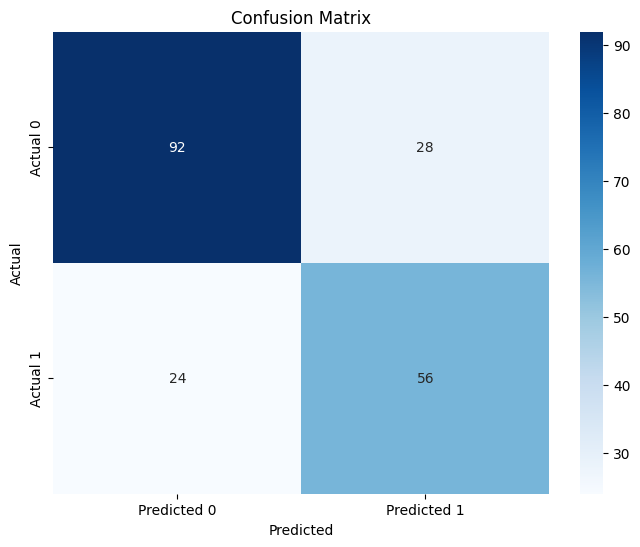

time: 402 ms (started: 2024-12-01 11:20:28 +00:00)


In [118]:
# Confusion Matrix
Eff_cm = confusion_matrix(Eff_y_test, Eff_y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(Eff_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### #M2.6.2. History Plot

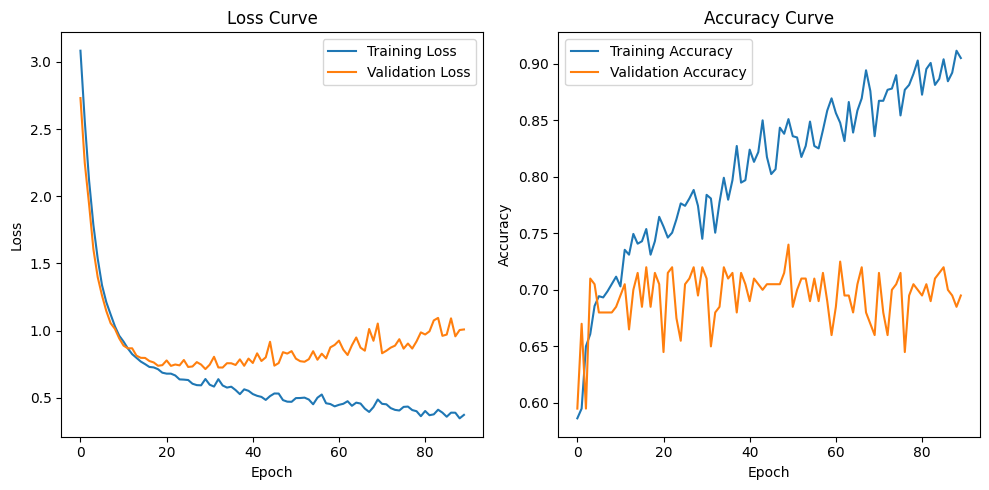

time: 954 ms (started: 2024-12-01 11:20:28 +00:00)


In [119]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(Eff_history.history['loss'], label='Training Loss')
plt.plot(Eff_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(Eff_history.history['accuracy'], label='Training Accuracy')
plt.plot(Eff_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()